In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
 pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install visualkeras
import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

import tensorflow as tf
import tensorflow_addons as tfa
import visualkeras
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 6.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

## Setting up general parameters

In [ ]:
# General parameters
epochs = 15
pic_size = 240
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


## Data Loading, Preperation and Visualization

In [ ]:
folder_path = "/content/drive/MyDrive/7-8semDataset/8semdataset/new"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')
dataset=[]
lab=[]

for image_name in no_images:
    image=cv2.imread(folder_path + '/no/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(0)

for image_name in yes_images:
    image=cv2.imread(folder_path + '/yes/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(1)

In [ ]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(5000, 240, 240, 3) (5000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
def plot_state(state):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(folder_path + "/" + state + "/" + os.listdir(folder_path + "/" + state)[i], target_size=(pic_size, pic_size))
        plt.imshow(img)
    plt.show()

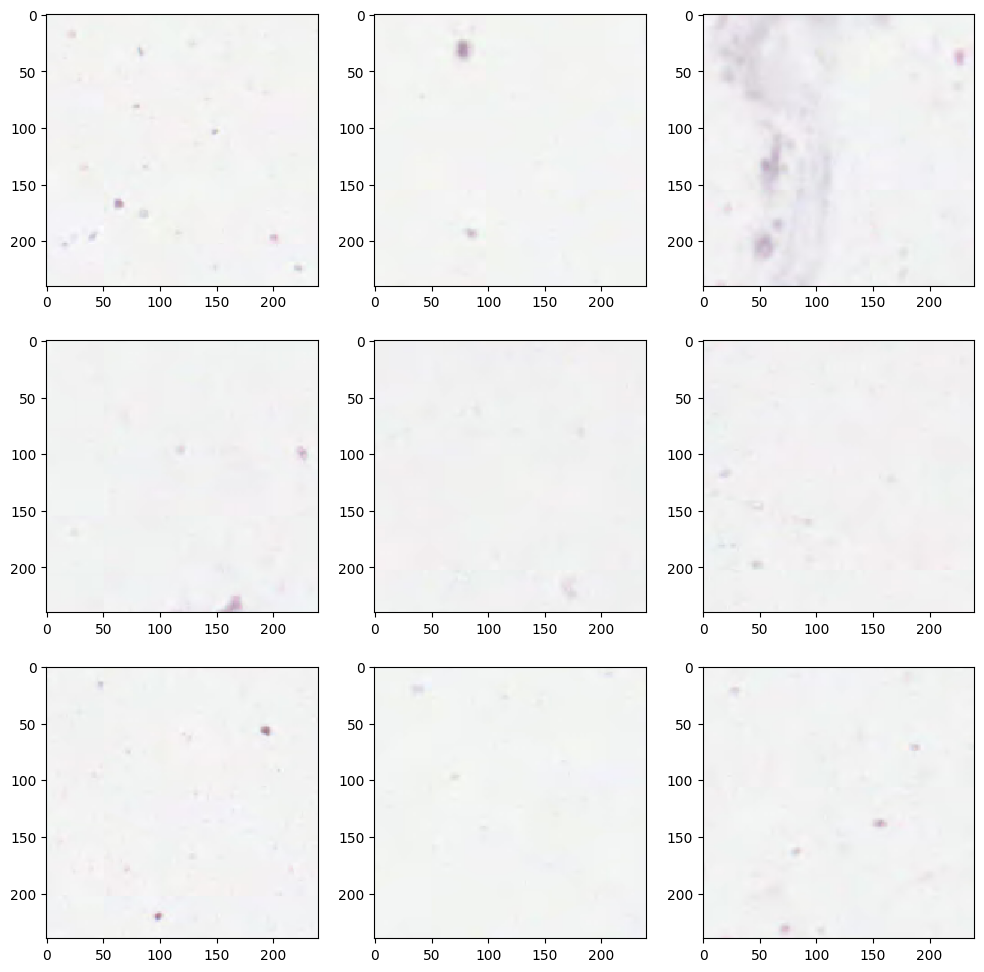

In [ ]:
plot_state('/no/')

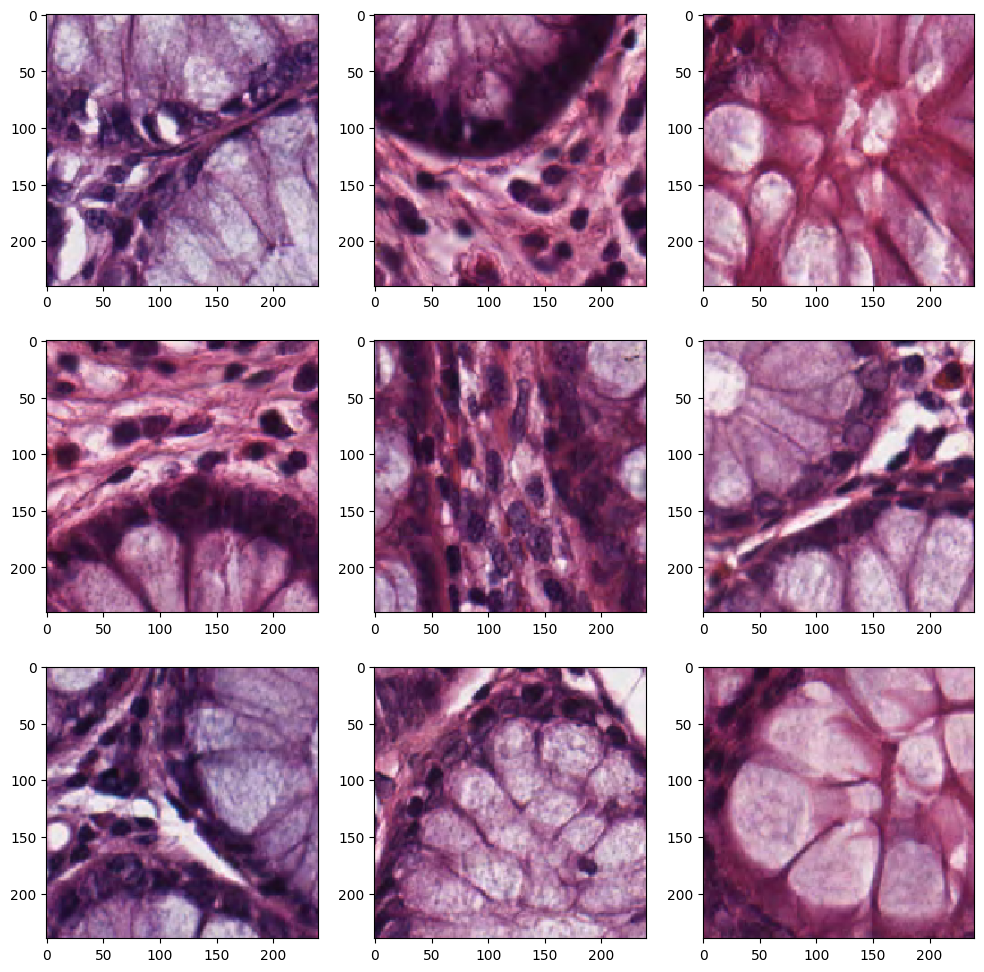

In [ ]:
plot_state("/yes/")

## Modeling using CNN

In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(pic_size,pic_size,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
                          bias_regularizer=regularizers.L2(1e-2),
                          activity_regularizer=regularizers.L2(1e-3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

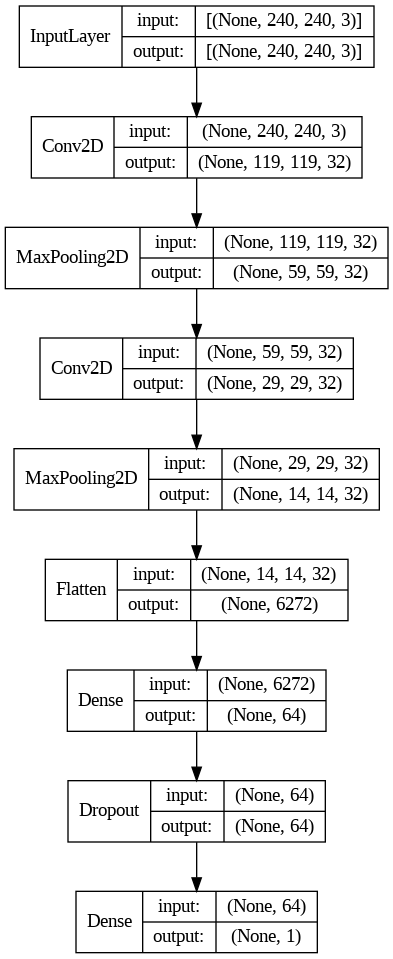

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

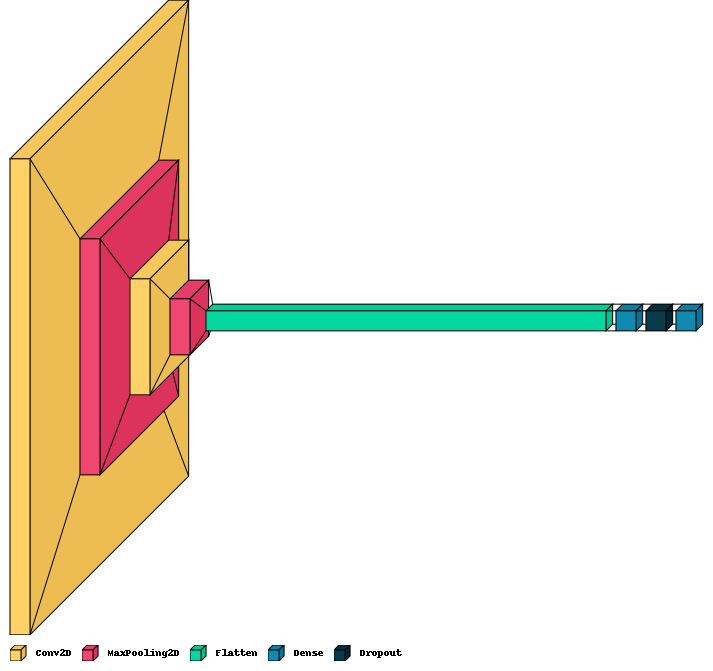

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 4.132231404958677, 1: 0.5688282138794084}

In [ ]:
history = model.fit(x_train,y_train,epochs =100, class_weight=class_weights, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
122/122 [==============================] - 51s 398ms/step - loss: 6.2874 - accuracy: 0.2002 - val_loss: 3.9263 - val_accuracy: 0.1473
Epoch 2/100
122/122 [==============================] - 47s 390ms/step - loss: 3.6125 - accuracy: 0.2298 - val_loss: 3.3874 - val_accuracy: 0.1462
Epoch 3/100
122/122 [==============================] - 55s 449ms/step - loss: 3.1051 - accuracy: 0.2693 - val_loss: 2.7080 - val_accuracy: 0.9743
Epoch 4/100
122/122 [==============================] - 46s 373ms/step - loss: 2.6632 - accuracy: 0.8944 - val_loss: 2.6715 - val_accuracy: 0.8538
Epoch 5/100
122/122 [==============================] - 46s 378ms/step - loss: 2.5122 - accuracy: 0.8755 - val_loss: 2.3370 - val_accuracy: 0.8538
Epoch 6/100
122/122 [==============================] - 48s 394ms/step - loss: 2.2342 - accuracy: 0.8704 - val_loss: 2.0927 - val_accuracy: 0.8538
Epoch 7/100
122/122 [==============================] - 48s 392ms/step - loss: 2.0317 - accuracy: 0.8676 - val_loss: 1.9108 -

## CNN model Evaluation

In [ ]:
# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1)
# plt.suptitle('Optimizer : Adam', fontsize=10)
# plt.ylabel('Loss', fontsize=16)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# #plt.legend(loc='upper right')

# plt.subplot(1, 2, 2)
# plt.ylabel('Accuracy', fontsize=16)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend(loc='lower right')
# #plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 82ms/step - loss: 1.6499 - accuracy: 0.9610
The current model achieved an accuracy of 96.1%!


In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 4s 106ms/step


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.96, Recall=0.79, specificity=1.00, precision=0.99, F1=0.88, GM=0.89, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean()* 100, recall.mean()* 100, spec.mean()* 100, precision.mean()* 100, F1.mean()* 100, GM.mean()* 100, FPR.mean()* 100))

Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

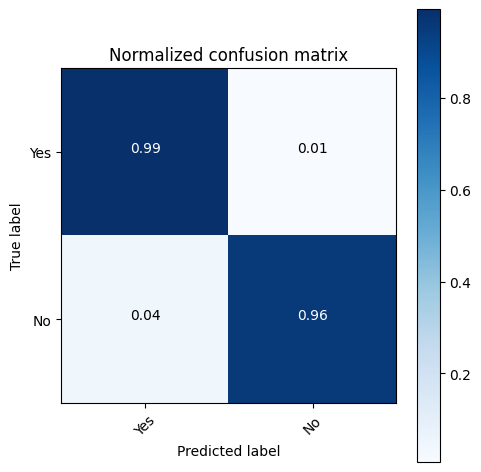

In [ ]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], title='Normalized confusion matrix')
plt.show()

## Modeling using Vision Transformers(ViT)

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 240  # We'll resize input images to this size
patch_size = 20  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

## Data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

## Multi-layer perceptron

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

## Implement patch creation as a layer

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 240 X 240
Patch size: 20 X 20
Patches per image: 144
Elements per patch: 1200


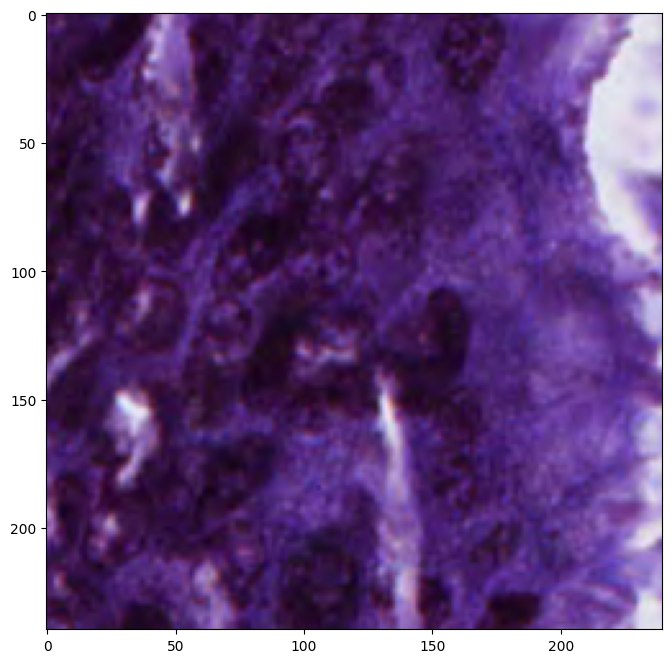

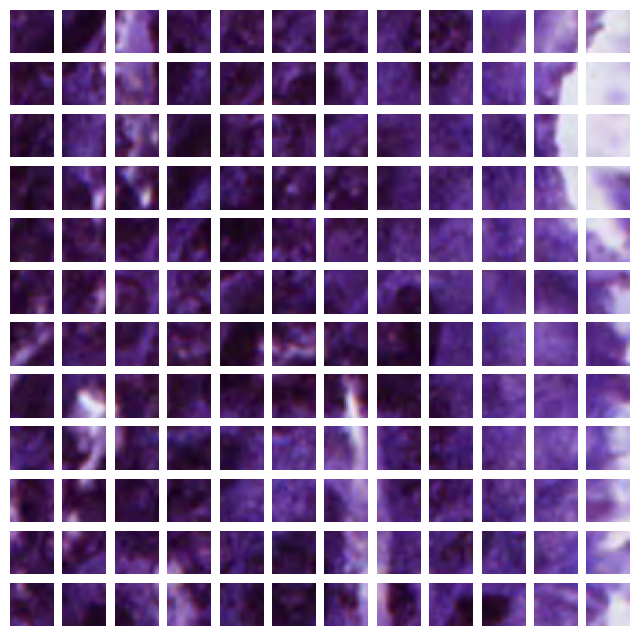

In [ ]:
plt.figure(figsize=(8, 8))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(8, 8))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=(240, 240, 3))
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(2)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [ ]:
vit_classifier = create_vit_classifier()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 248s 15s/step - loss: 2.2620 - accuracy: 0.8426 - top-5-accuracy: 1.0000 - val_loss: 0.5322 - val_accuracy: 0.8538 - val_top-5-accuracy: 1.0000
Epoch 2/100
16/16 [==============================] - 228s 14s/step - loss: 0.5573 - accuracy: 0.8807 - top-5-accuracy: 1.0000 - val_loss: 0.1788 - val_accuracy: 0.8877 - val_top-5-accuracy: 1.0000
Epoch 3/100
16/16 [==============================] - 225s 14s/step - loss: 0.2023 - accuracy: 0.9116 - top-5-accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 0.9145 - val_top-5-accuracy: 1.0000
Epoch 4/100
16/16 [==============================] - 229s 14s/step - loss: 0.1606 - accuracy: 0.9245 - top-5-accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 0.9145 - val_top-5-accuracy: 1.0000
Epoch 5/100
16/16 [==============================] - 227s 14s/step - loss: 0.1203 - accuracy: 0.9433 - top-5-accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 0.9166 - val_top-5-accuracy: 1.0000
Epoch 6/100
16/

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 4s 108ms/step - loss: 1.6499 - accuracy: 0.9610
The current model achieved an accuracy of 96.1%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 3s 86ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.96, Recall=0.79, specificity=1.00, precision=0.99, F1=0.88, GM=0.89, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 96.1000, Recall=78.6517, specificity=99.8783, precision=99.2908, F1=87.7743, GM=88.6318, FPR=0.1217
Accuracy: 

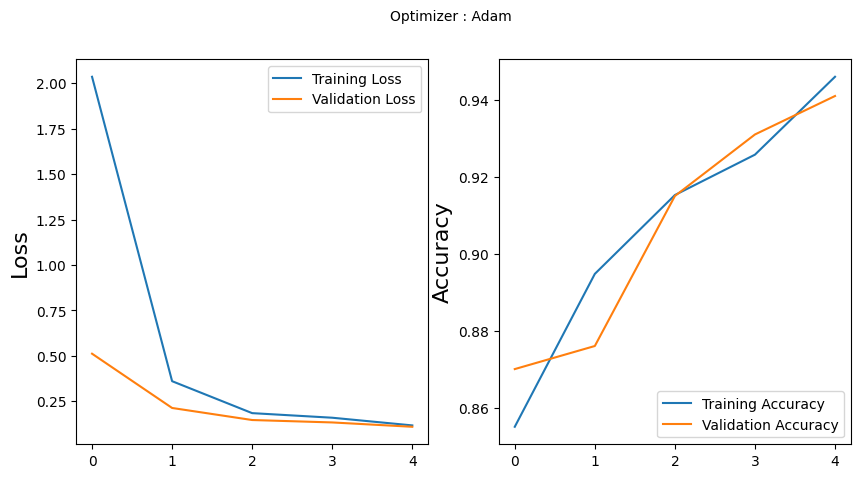

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(vit_history.history['loss'], label='Training Loss')
plt.plot(vit_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(vit_history.history['accuracy'], label='Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# compute predictions
vit_predictions = vit_classifier.predict(x_test)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

32/32 [==============================] - 26s 761ms/step


<Figure size 640x480 with 0 Axes>

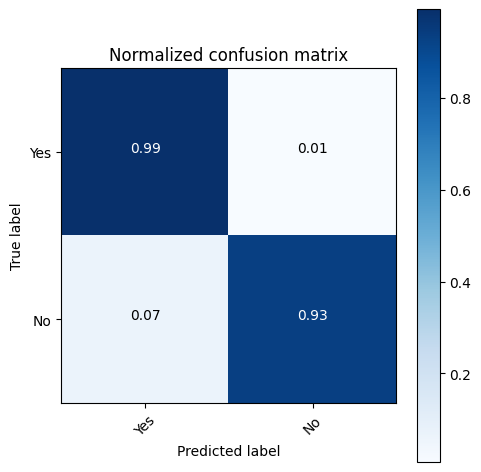

In [ ]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Yes", "No"], title='Normalized confusion matrix')
plt.show()

**Building the DeepViT**

In [ ]:
pip install keras-models


In [ ]:
pip install vit-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:
import tensorflow as tf
from tensorflow import einsum
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn

from einops import rearrange, repeat
from einops.layers.tensorflow import Rearrange

class PreNorm(Layer):
    def _init_(self, fn):
        super(PreNorm, self)._init_()

        self.norm = nn.LayerNormalization()
        self.fn = fn

    def call(self, x, training=True):
        return self.fn(self.norm(x), training=training)

class MLP(Layer):
    def _init_(self, dim, hidden_dim, dropout=0.0):
        super(MLP, self)._init_()
        def GELU():
            def gelu(x, approximate=False):
                if approximate:
                    coeff = tf.cast(0.044715, x.dtype)
                    return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
                else:
                    return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

            return nn.Activation(gelu)

        self.net = [
            nn.Dense(units=hidden_dim),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ]
        self.net = Sequential(self.net)

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def _init_(self, dim, heads=8, dim_head=64, dropout=0.0):
        super(Attention, self)._init_()
        inner_dim = dim_head * heads

        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax()
        self.to_qkv = nn.Dense(units=inner_dim * 3, use_bias=False)

        self.reattn_weights = tf.Variable(initial_value=tf.random.normal([heads, heads]))

        self.reattn_norm = [
            Rearrange('b h i j -> b i j h'),
            nn.LayerNormalization(),
            Rearrange('b i j h -> b h i j')
        ]

        self.to_out = [
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ]

        self.reattn_norm = Sequential(self.reattn_norm)
        self.to_out = Sequential(self.to_out)

    def call(self, x, training=True):
        qkv = self.to_qkv(x)
        qkv = tf.split(qkv, num_or_size_splits=3, axis=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.heads), qkv)

        # attention
        dots = tf.matmul(q, tf.transpose(k, perm=[0, 1, 3, 2])) * self.scale
        attn = self.attend(dots)

        # re-attention
        attn = einsum('b h i j, h g -> b g i j', attn, self.reattn_weights)
        attn = self.reattn_norm(attn)

        # aggregate and out
        x = tf.matmul(attn, v)
        x = rearrange(x, 'b h n d -> b n (h d)')
        x = self.to_out(x, training=training)

        return x

class Transformer(Layer):
    def _init_(self, dim, depth, heads, dim_head, mlp_dim, dropout=0.0):
        super(Transformer, self)._init_()

        self.layers = []

        for _ in range(depth):
            self.layers.append([
                PreNorm(Attention(dim, heads=heads, dim_head=dim_head, dropout=dropout)),
                PreNorm(MLP(dim, mlp_dim, dropout=dropout))
            ])

    def call(self, x, training=True):
        for attn, mlp in self.layers:
            x = attn(x, training=training) + x
            x = mlp(x, training=training) + x

        return x

class DeepViT(Model):
    def _init_(self, image_size=256, patch_size=32, num_classes=1000, dim=1020, depth=6, heads=16, mlp_dim=2048,
                 pool='cls', dim_head=64, dropout=0.0, emb_dropout=0.0):
        super(DeepViT, self)._init_()

        assert image_size % patch_size == 0, 'Image dimensions must be divisible by the patch size.'
        num_patches = (image_size // patch_size) ** 2
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'

        self.patch_embedding = Sequential([
            Rearrange('b (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            nn.Dense(units=dim)
        ], name='patch_embedding')

        self.pos_embedding = tf.Variable(initial_value=tf.random.normal([1, num_patches + 1, dim]))
        self.cls_token = tf.Variable(initial_value=tf.random.normal([1, 1, dim]))
        self.dropout = nn.Dropout(rate=emb_dropout)

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)

        self.pool = pool

        self.mlp_head = Sequential([
            nn.LayerNormalization(),
            nn.Dense(units=num_classes)
        ], name='mlp_head')

    def call(self, img, training=True, **kwargs):
        x = self.patch_embedding(img)
        b, n, d = x.shape

        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b=b)
        x = tf.concat([cls_tokens, x], axis=1)
        x += self.pos_embedding[:, :(n + 1)]
        x = self.dropout(x, training=training)

        x = self.transformer(x, training=training)

        if self.pool == 'mean':
            x = tf.reduce_mean(x, axis=1)
        else:
            x = x[:, 0]

        x = self.mlp_head(x)

        return x



# v = DeepViT(
#     image_size = 256,
#     patch_size = 32,
#     num_classes = 1000,
#     dim = 1024,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 2048,
#     dropout = 0.1,
#     emb_dropout = 0.1
# )

# img = tf.random.normal(shape=[1, 256, 256, 3])
# preds = v(img) # (1, 1000)

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),##
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )

    # model.load_weights(checkpoint_filepath)    #model=x
    # _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test) #model=x
    # print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    # print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [ ]:
vit_classifier = DeepViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 87s 5s/step - loss: 0.1621 - accuracy: 0.9943 - val_loss: 0.1690 - val_accuracy: 0.9876
Epoch 2/100
16/16 [==============================] - 66s 4s/step - loss: 0.1509 - accuracy: 0.9941 - val_loss: 0.1552 - val_accuracy: 0.9876
Epoch 3/100
16/16 [==============================] - 50s 3s/step - loss: 0.1363 - accuracy: 0.9946 - val_loss: 0.1496 - val_accuracy: 0.9856
Epoch 4/100
16/16 [==============================] - 50s 3s/step - loss: 0.1291 - accuracy: 0.9964 - val_loss: 0.1398 - val_accuracy: 0.9887
Epoch 5/100
16/16 [==============================] - 49s 3s/step - loss: 0.1235 - accuracy: 0.9961 - val_loss: 0.1347 - val_accuracy: 0.9887
Epoch 6/100
16/16 [==============================] - 48s 3s/step - loss: 0.1201 - accuracy: 0.9954 - val_loss: 0.1310 - val_accuracy: 0.9887
Epoch 7/100
16/16 [==============================] - 69s 4s/step - loss: 0.1184 - accuracy: 0.9956 - val_loss: 0.1298 - val_accuracy: 0.9887
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 103ms/step - loss: 1.4679 - accuracy: 0.9700
The current model achieved an accuracy of 97.0%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 4s 139ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.97, Recall=0.83, specificity=1.00, precision=0.99, F1=0.90, GM=0.91, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 97.0000, Recall=82.8402, specificity=99.8797, precision=99.2908, F1=90.3226, GM=90.9618, FPR=0.1203
Accuracy: 

*Building the MobileViT*

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn

from einops import rearrange
from einops.layers.tensorflow import Reduce


def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))


class GELU(Layer):
    def __init__(self, approximate=False):
        super(GELU, self).__init__()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)


class Swish(Layer):
    def __init__(self):
        super(Swish, self).__init__()

    def call(self, x, training=True):
        x = tf.keras.activations.swish(x)
        return x


class Conv_NxN_BN(Layer):
    def __init__(self, dim, kernel_size=1, stride=1):
        super(Conv_NxN_BN, self).__init__()

        self.layers = Sequential([
            nn.Conv2D(filters=dim, kernel_size=kernel_size, strides=stride, padding='SAME', use_bias=False),
            nn.BatchNormalization(momentum=0.9, epsilon=1e-5),
            Swish()
        ])

    def call(self, x, training=True):
        x = self.layers(x, training=training)
        return x


class PreNorm(Layer):
    def __init__(self, fn):
        super(PreNorm, self).__init__()

        self.norm = nn.LayerNormalization()
        self.fn = fn

    def call(self, x, training=True):
        return self.fn(self.norm(x), training=training)


class MLP(Layer):
    def __init__(self, dim, hidden_dim, dropout=0.0):
        super(MLP, self).__init__()

        self.net = Sequential([
            nn.Dense(units=hidden_dim),
            Swish(),
            nn.Dropout(rate=dropout),
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        return self.net(x, training=training)


class Attention(Layer):
    def __init__(self, dim, heads=8, dim_head=64, dropout=0.0):
        super(Attention, self).__init__()

        inner_dim = dim_head * heads
        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax()
        self.to_qkv = nn.Dense(units=inner_dim * 3, use_bias=False)

        self.to_out = Sequential([
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        qkv = self.to_qkv(x)
        qkv = tf.split(qkv, num_or_size_splits=3, axis=-1)

        q, k, v = map(lambda t: rearrange(t, 'b p n (h d) -> b p h n d', h=self.heads), qkv)

        dots = tf.matmul(q, tf.transpose(k, perm=[0, 1, 3, 2])) * self.scale
        attn = self.attend(dots)
        out = tf.matmul(attn, v)
        out = rearrange(out, 'b p h n d -> b p n (h d)')
        out = self.to_out(out, training=training)

        return out


class Transformer(Layer):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout=0.0):
        super(Transformer, self).__init__()

        self.layers = []

        for _ in range(depth):
            self.layers.append([
                PreNorm(Attention(dim, heads, dim_head, dropout)),
                PreNorm(MLP(dim, mlp_dim, dropout))
            ])

    def call(self, x, training=True):
        for attn, ff in self.layers:
            x = attn(x, training=training) + x
            x = ff(x, training=training) + x

        return x


class MV2Block(Layer):
    def __init__(self, dim_in, dim_out, stride=1, expansion=4):
        super(MV2Block, self).__init__()

        assert stride in [1, 2]

        hidden_dim = int(dim_in * expansion)
        self.use_res_connect = stride == 1 and dim_in == dim_out

        if expansion == 1:
            self.conv = Sequential([
                # dw
                nn.Conv2D(filters=hidden_dim, kernel_size=3, strides=stride, padding='SAME', groups=hidden_dim,
                          use_bias=False),
                nn.BatchNormalization(momentum=0.9, epsilon=1e-5),
                Swish(),
                # pw-linear
                nn.Conv2D(filters=dim_out, kernel_size=1, strides=1, use_bias=False),
                nn.BatchNormalization(momentum=0.9, epsilon=1e-5)
            ])
        else:
            self.conv = Sequential([
                # pw
                nn.Conv2D(filters=hidden_dim, kernel_size=1, strides=1, use_bias=False),
                nn.BatchNormalization(momentum=0.9, epsilon=1e-5),
                Swish(),
                # dw
                nn.Conv2D(filters=hidden_dim, kernel_size=3, strides=stride, padding='SAME', groups=hidden_dim,
                          use_bias=False),
                nn.BatchNormalization(momentum=0.9, epsilon=1e-5),
                Swish(),
                # pw-linear
                nn.Conv2D(filters=dim_out, kernel_size=1, strides=1, use_bias=False),
                nn.BatchNormalization(momentum=0.9, epsilon=1e-5)
            ])

    def call(self, x, training=True):
        out = self.conv(x, training=training)
        if self.use_res_connect:
            out = out + x
        return out


class MobileViTBlock(Layer):
    def __init__(self, dim, depth, channel, kernel_size, patch_size, mlp_dim, dropout=0.0):
        super(MobileViTBlock, self).__init__()

        self.ph, self.pw = patch_size

        self.conv1 = Conv_NxN_BN(channel, kernel_size=kernel_size, stride=1)
        self.conv2 = Conv_NxN_BN(dim, kernel_size=1, stride=1)

        self.transformer = Transformer(dim=dim, depth=depth, heads=4, dim_head=8, mlp_dim=mlp_dim, dropout=dropout)

        self.conv3 = Conv_NxN_BN(channel, kernel_size=1, stride=1)
        self.conv4 = Conv_NxN_BN(channel, kernel_size=kernel_size, stride=1)

    def call(self, x, training=True):
        y = tf.identity(x)

        # Local representations
        x = self.conv1(x, training=training)
        x = self.conv2(x, training=training)

        # Global representations
        _, h, w, c = x.shape
        x = rearrange(x, 'b (h ph) (w pw) d -> b (ph pw) (h w) d', ph=self.ph, pw=self.pw)
        x = self.transformer(x, training=training)
        x = rearrange(x, 'b (ph pw) (h w) d -> b (h ph) (w pw) d', h=h // self.ph, w=w // self.pw, ph=self.ph,
                      pw=self.pw)

        # Fusion
        x = self.conv3(x, training=training)
        x = tf.concat([x, y], axis=-1)
        x = self.conv4(x, training=training)

        return x


class MobileViT(Model):
    def __init__(self,
                 image_size=(256, 256),
                 dims=[96, 120, 144],
                 channels=[16, 32, 48, 48, 64, 64, 80, 80, 96, 96, 384],
                 num_classes=1000,
                 expansion=4,
                 kernel_size=3,
                 patch_size=(2, 2),
                 depths=(2, 4, 3)
                 ):
        super(MobileViT, self).__init__()
        assert len(dims) == 3, 'dims must be a tuple of 3'
        assert len(depths) == 3, 'depths must be a tuple of 3'

        ih, iw = image_size
        ph, pw = patch_size
        assert ih % ph == 0 and iw % pw == 0

        init_dim, *_, last_dim = channels

        self.conv1 = Conv_NxN_BN(init_dim, kernel_size=3, stride=2)

        self.stem = Sequential()
        self.stem.add(MV2Block(channels[0], channels[1], stride=1, expansion=expansion))
        self.stem.add(MV2Block(channels[1], channels[2], stride=2, expansion=expansion))
        self.stem.add(MV2Block(channels[2], channels[3], stride=1, expansion=expansion))
        self.stem.add(MV2Block(channels[2], channels[3], stride=1, expansion=expansion))

        self.trunk = []
        self.trunk.append([
            MV2Block(channels[3], channels[4], stride=2, expansion=expansion),
            MobileViTBlock(dims[0], depths[0], channels[5], kernel_size, patch_size, mlp_dim=int(dims[0] * 2))
        ])

        self.trunk.append([
            MV2Block(channels[5], channels[6], stride=2, expansion=expansion),
            MobileViTBlock(dims[1], depths[1], channels[7], kernel_size, patch_size, mlp_dim=int(dims[1] * 4))
        ])

        self.trunk.append([
            MV2Block(channels[7], channels[8], stride=2, expansion=expansion),
            MobileViTBlock(dims[2], depths[2], channels[9], kernel_size, patch_size, mlp_dim=int(dims[2] * 4))
        ])

        self.to_logits = Sequential([
            Conv_NxN_BN(last_dim, kernel_size=1, stride=1),
            Reduce('b h w c -> b c', 'mean'),
            nn.Dense(units=num_classes, use_bias=False)
        ])

    def call(self, x, training=True, **kwargs):
        x = self.conv1(x, training=training)

        x = self.stem(x, training=training)

        for conv, attn in self.trunk:
            x = conv(x, training=training)
            x = attn(x, training=training)

        x = self.to_logits(x, training=training)

        return x

""" Usage
v = MobileViT(
    image_size=(256, 256),
    dims=[96, 120, 144],
    channels=[16, 32, 48, 48, 64, 64, 80, 80, 96, 96, 384],
    num_classes=1000
)

img = tf.random.normal(shape=[1, 256, 256, 3])
preds = v(img)  # (1, 1000)
"""

' Usage\nv = MobileViT(\n    image_size=(256, 256),\n    dims=[96, 120, 144],\n    channels=[16, 32, 48, 48, 64, 64, 80, 80, 96, 96, 384],\n    num_classes=1000\n)\n\nimg = tf.random.normal(shape=[1, 256, 256, 3])\npreds = v(img)  # (1, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )


    return history

In [ ]:
vit_classifier = MobileViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 59s 3s/step - loss: 0.0938 - accuracy: 0.9961 - val_loss: 0.1126 - val_accuracy: 0.9846
Epoch 2/100
16/16 [==============================] - 58s 4s/step - loss: 0.0998 - accuracy: 0.9930 - val_loss: 0.1155 - val_accuracy: 0.9866
Epoch 3/100
16/16 [==============================] - 56s 4s/step - loss: 0.1013 - accuracy: 0.9951 - val_loss: 0.1140 - val_accuracy: 0.9856
Epoch 4/100
16/16 [==============================] - 53s 3s/step - loss: 0.0975 - accuracy: 0.9956 - val_loss: 0.1122 - val_accuracy: 0.9866
Epoch 5/100
16/16 [==============================] - 54s 3s/step - loss: 0.0976 - accuracy: 0.9964 - val_loss: 0.1154 - val_accuracy: 0.9846
Epoch 6/100
16/16 [==============================] - 54s 3s/step - loss: 0.0993 - accuracy: 0.9954 - val_loss: 0.1158 - val_accuracy: 0.9856
Epoch 7/100
16/16 [==============================] - 53s 3s/step - loss: 0.1016 - accuracy: 0.9964 - val_loss: 0.1151 - val_accuracy: 0.9866
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 80ms/step - loss: 1.3324 - accuracy: 0.9780
The current model achieved an accuracy of 97.8%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 3s 94ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.98, Recall=0.87, specificity=1.00, precision=0.99, F1=0.93, GM=0.93, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 97.8000, Recall=87.4214, specificity=99.7622, precision=98.5816, F1=92.6667, GM=93.3882, FPR=0.2378
Accuracy: 

*Building the CaitViT*

In [ ]:
import tensorflow as tf
from tensorflow import einsum
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn

from einops import rearrange, repeat
from einops.layers.tensorflow import Rearrange

from random import randrange
import numpy as np

def exists(val):
    return val is not None

def dropout_layers(layers, dropout):
    if dropout == 0:
        return layers

    num_layers = len(layers)

    to_drop = np.random.uniform(low=0.0, high=1.0, size=[num_layers]) < dropout

    # make sure at least one layer makes it
    if all(to_drop):
        rand_index = randrange(num_layers)
        to_drop[rand_index] = False

    layers = [layer for (layer, drop) in zip(layers, to_drop) if not drop]
    return layers

class LayerScale(Layer):
    def _init_(self, dim, fn, depth):
        super(LayerScale, self)._init_()
        if depth <= 18: # epsilon detailed in section 2 of paper
            init_eps = 0.1
        elif depth > 18 and depth <= 24:
            init_eps = 1e-5
        else:
            init_eps = 1e-6

        scale = tf.fill(dims=[1, 1, dim], value=init_eps)
        self.scale = tf.Variable(scale)
        self.fn = fn

    def call(self, x, training=True, **kwargs):
        return self.fn(x, training=training, **kwargs) * self.scale

class PreNorm(Layer):
    def _init_(self, fn):
        super(PreNorm, self)._init_()

        self.norm = nn.LayerNormalization()
        self.fn = fn

    def call(self, x, training=True, **kwargs):
        return self.fn(self.norm(x), training=training, **kwargs)

class MLP(Layer):
    def _init_(self, dim, hidden_dim, dropout=0.0):
        super(MLP, self)._init_()
        def GELU():
            def gelu(x, approximate=False):
                if approximate:
                    coeff = tf.cast(0.044715, x.dtype)
                    return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
                else:
                    return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

            return nn.Activation(gelu)

        self.net = [
            nn.Dense(units=hidden_dim),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ]
        self.net = Sequential(self.net)

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def _init_(self, dim, heads=8, dim_head=64, dropout=0.0):
        super(Attention, self)._init_()
        inner_dim = dim_head * heads

        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax()
        self.to_q = nn.Dense(units=inner_dim, use_bias=False)
        self.to_kv = nn.Dense(units=inner_dim * 2, use_bias=False)

        self.mix_heads_pre_attn = tf.Variable(initial_value=tf.random.normal([heads, heads]))
        self.mix_heads_post_attn = tf.Variable(initial_value=tf.random.normal([heads, heads]))

        self.to_out = [
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ]

        self.to_out = Sequential(self.to_out)

    def call(self, x, context=None, training=True):

        if not exists(context):
            context = x
        else:
            context = tf.concat([x, context], axis=1)

        q = self.to_q(x)
        kv = self.to_kv(context)
        k, v = tf.split(kv, num_or_size_splits=2, axis=-1)
        qkv = (q, k, v)

        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.heads), qkv)

        dots = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale

        dots = einsum('b h i j, h g -> b g i j', dots, self.mix_heads_pre_attn)  # talking heads, pre-softmax
        attn = self.attend(dots)
        attn = einsum('b h i j, h g -> b g i j', attn, self.mix_heads_post_attn)  # talking heads, post-softmax

        x = tf.matmul(attn, v)
        x = rearrange(x, 'b h n d -> b n (h d)')
        x = self.to_out(x, training=training)

        return x

class Transformer(Layer):
    def _init_(self, dim, depth, heads, dim_head, mlp_dim, dropout=0.0, layer_dropout=0.0):
        super(Transformer, self)._init_()

        self.layers = []
        self.layer_dropout = layer_dropout

        for ind in range(depth):
            self.layers.append([
                LayerScale(dim, PreNorm(Attention(dim, heads=heads, dim_head=dim_head, dropout=dropout)), depth=ind+1),
                LayerScale(dim, PreNorm(MLP(dim, mlp_dim, dropout=dropout)), depth=ind+1)
            ])

    def call(self, x, context=None, training=True):
        layers = dropout_layers(self.layers, dropout=self.layer_dropout)

        for attn, mlp in layers:
            x = attn(x, context=context, training=training) + x
            x = mlp(x, training=training) + x

        return x

class CaiT(Model):
    def _init_(self, image_size=256, patch_size=32, num_classes=1000, dim=1024, depth=12, cls_depth=2, heads=16, mlp_dim=2048,
                 dim_head=64, dropout=0.0, emb_dropout=0.0, layer_dropout=0.0):
        super(CaiT, self)._init_()

        assert image_size % patch_size == 0, 'Image dimensions must be divisible by the patch size.'
        num_patches = (image_size // patch_size) ** 2

        self.patch_embedding = Sequential([
            Rearrange('b (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            nn.Dense(units=dim)
        ], name='patch_embedding')

        self.pos_embedding = tf.Variable(initial_value=tf.random.normal([1, num_patches, dim]))
        self.cls_token = tf.Variable(initial_value=tf.random.normal([1, 1, dim]))
        self.dropout = nn.Dropout(rate=emb_dropout)

        self.patch_transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout, layer_dropout)
        self.cls_transformer = Transformer(dim, cls_depth, heads, dim_head, mlp_dim, dropout, layer_dropout)

        self.mlp_head = Sequential([
            nn.LayerNormalization(),
            nn.Dense(units=num_classes)
        ], name='mlp_head')

    def call(self, img, training=True, **kwargs):
        x = self.patch_embedding(img)
        b, n, d = x.shape

        x += self.pos_embedding[:, :n]
        x = self.dropout(x, training=training)

        x = self.patch_transformer(x, training=training)

        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b=b)
        x = self.cls_transformer(cls_tokens, context=x, training=training)

        x = self.mlp_head(x[:, 0])

        return x

""" Usage
v = CaiT(
    image_size = 256,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 12,             # depth of transformer for patch to patch attention only
    cls_depth = 2,          # depth of cross attention of CLS tokens to patch
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1,
    layer_dropout = 0.05    # randomly dropout 5% of the layers
)

img = tf.random.normal(shape=[1, 256, 256, 3])
preds = v(img) # (1, 1000)
"""

' Usage\nv = CaiT(\n    image_size = 256,\n    patch_size = 32,\n    num_classes = 1000,\n    dim = 1024,\n    depth = 12,             # depth of transformer for patch to patch attention only\n    cls_depth = 2,          # depth of cross attention of CLS tokens to patch\n    heads = 16,\n    mlp_dim = 2048,\n    dropout = 0.1,\n    emb_dropout = 0.1,\n    layer_dropout = 0.05    # randomly dropout 5% of the layers\n)\n\nimg = tf.random.normal(shape=[1, 256, 256, 3])\npreds = v(img) # (1, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )

    # x.load_weights(checkpoint_filepath)
    # _, accuracy, top_5_accuracy = x.evaluate(x_test, y_test)
    # print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    # print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [ ]:
vit_classifier = CaiT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 59s 4s/step - loss: 0.2640 - accuracy: 0.9894 - val_loss: 0.2817 - val_accuracy: 0.9743
Epoch 2/100
16/16 [==============================] - 60s 4s/step - loss: 0.2573 - accuracy: 0.9884 - val_loss: 0.8810 - val_accuracy: 0.8538
Epoch 3/100
16/16 [==============================] - 50s 3s/step - loss: 0.6020 - accuracy: 0.8879 - val_loss: 0.3586 - val_accuracy: 0.9691
Epoch 4/100
16/16 [==============================] - 56s 4s/step - loss: 0.3686 - accuracy: 0.9742 - val_loss: 0.3679 - val_accuracy: 0.9722
Epoch 5/100
16/16 [==============================] - 53s 3s/step - loss: 0.3472 - accuracy: 0.9794 - val_loss: 0.3236 - val_accuracy: 0.9732
Epoch 6/100
16/16 [==============================] - 53s 3s/step - loss: 0.3225 - accuracy: 0.9845 - val_loss: 0.3312 - val_accuracy: 0.9743
Epoch 7/100
16/16 [==============================] - 53s 3s/step - loss: 0.2920 - accuracy: 0.9866 - val_loss: 0.2880 - val_accuracy: 0.9701
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 80ms/step - loss: 1.3288 - accuracy: 0.9740
The current model achieved an accuracy of 97.4%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 4s 141ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.97, Recall=0.85, specificity=1.00, precision=0.99, F1=0.92, GM=0.92, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 97.4000, Recall=84.8485, specificity=99.8802, precision=99.2908, F1=91.5033, GM=92.0581, FPR=0.1198
Accuracy: 

*Building the LeViT*

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn

from tensorflow import einsum
from einops import rearrange

from math import ceil

def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

def cast_tuple(val, l = 3):
    val = val if isinstance(val, tuple) else (val,)
    return (*val, *((val[-1],) * max(l - len(val), 0)))

def always(val):
    return lambda *args, **kwargs: val

def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

class HardSwish(Layer):
    def __init__(self):
        super(HardSwish, self).__init__()

    def call(self, x, training=True):
        x = x * tf.nn.relu6(x + 3.0) / 6.0
        return x

class GELU(Layer):
    def __init__(self, approximate=False):
        super(GELU, self).__init__()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)

class MLP(Layer):
    def __init__(self, dim, mult, dropout=0.0):
        super(MLP, self).__init__()

        self.net = [
            nn.Conv2D(filters=dim * mult, kernel_size=1, strides=1),
            HardSwish(),
            nn.Dropout(rate=dropout),
            nn.Conv2D(filters=dim, kernel_size=1, strides=1),
            nn.Dropout(rate=dropout)
        ]
        self.net = Sequential(self.net)

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def __init__(self, dim, fmap_size, heads=8, dim_key=32, dim_value=64, dropout=0.0, dim_out=None, downsample=False):
        super(Attention, self).__init__()
        inner_dim_key = dim_key * heads
        inner_dim_value = dim_value * heads
        dim_out = default(dim_out, dim)

        self.heads = heads
        self.scale = dim_key ** -0.5

        self.to_q = Sequential([
            nn.Conv2D(filters=inner_dim_key, kernel_size=1, strides=(2 if downsample else 1), use_bias=False),
            nn.BatchNormalization(momentum=0.9, epsilon=1e-05),
        ])

        self.to_k = Sequential([
            nn.Conv2D(filters=inner_dim_key, kernel_size=1, strides=1, use_bias=False),
            nn.BatchNormalization(momentum=0.9, epsilon=1e-05),
        ])

        self.to_v = Sequential([
            nn.Conv2D(filters=inner_dim_value, kernel_size=1, strides=1, use_bias=False),
            nn.BatchNormalization(momentum=0.9, epsilon=1e-05),
        ])

        self.attend = nn.Softmax()

        out_batch_norm = nn.BatchNormalization(momentum=0.9, epsilon=1e-05, gamma_initializer='zeros')

        self.to_out = Sequential([
            GELU(),
            nn.Conv2D(filters=dim_out, kernel_size=1, strides=1),
            out_batch_norm,
            nn.Dropout(rate=dropout)
        ])

        # positional bias
        self.pos_bias = nn.Embedding(input_dim=fmap_size * fmap_size, output_dim=heads)
        q_range = tf.range(0, fmap_size, delta=(2 if downsample else 1))
        k_range = tf.range(fmap_size)

        q_pos = tf.stack(tf.meshgrid(q_range, q_range, indexing='ij'), axis=-1)
        k_pos = tf.stack(tf.meshgrid(k_range, k_range, indexing='ij'), axis=-1)

        q_pos, k_pos = map(lambda t: rearrange(t, 'i j c -> (i j) c'), (q_pos, k_pos))
        rel_pos = tf.abs((q_pos[:, None, ...] - k_pos[None, :, ...]))

        x_rel, y_rel = tf.unstack(rel_pos, axis=-1)
        self.pos_indices = (x_rel * fmap_size) + y_rel

    def apply_pos_bias(self, fmap):
        bias = self.pos_bias(self.pos_indices)
        bias = rearrange(bias, 'i j h -> () h i j')
        return fmap + (bias / self.scale)

    def call(self, x, training=True):
        b, height, width, n = x.shape
        q = self.to_q(x)

        h = self.heads
        y = q.shape[1] # height

        qkv = (q, self.to_k(x), self.to_v(x))
        q, k, v = map(lambda t: rearrange(t, 'b ... (h d) -> b h (...) d', h=h), qkv)

        # i,j = height*width
        dots = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale
        dots = self.apply_pos_bias(dots)

        attn = self.attend(dots)

        x = einsum('b h i j, b h j d -> b h i d', attn, v)
        x = rearrange(x, 'b h (x y) d -> b x y (h d)', h=h, y=y)
        x = self.to_out(x, training=training)

        return x

class Transformer(Layer):
    def __init__(self, dim, fmap_size, depth, heads, dim_key, dim_value, mlp_mult=2, dropout=0.0, dim_out=None, downsample=False):
        super(Transformer, self).__init__()

        dim_out = default(dim_out, dim)
        self.attn_residual = (not downsample) and dim == dim_out
        self.layers = []

        for _ in range(depth):
            self.layers.append([
                Attention(dim, fmap_size=fmap_size, heads=heads, dim_key=dim_key, dim_value=dim_value,
                          dropout=dropout, downsample=downsample, dim_out=dim_out),
                MLP(dim_out, mlp_mult, dropout=dropout)
            ])

    def call(self, x, training=True):
        for attn, mlp in self.layers:
            attn_res = (x if self.attn_residual else 0)
            x = attn(x, training=training) + attn_res
            x = mlp(x, training=training) + x

        return x

class LeViT(Model):
    def __init__(self,
                 image_size=224,
                 num_classes=1000,
                 dim=(256, 384, 512),
                 depth=4,
                 heads=(4, 6, 8),
                 mlp_mult=2,
                 stages=3,
                 dim_key=32,
                 dim_value=64,
                 dropout=0.0,
                 num_distill_classes=None
                 ):
        super(LeViT, self).__init__()

        dims = cast_tuple(dim, stages)
        depths = cast_tuple(depth, stages)
        layer_heads = cast_tuple(heads, stages)

        assert all(map(lambda t: len(t) == stages, (dims, depths, layer_heads))), \
            'dimensions, depths, and heads must be a tuple that is less than the designated number of stages'

        self.conv_embedding = Sequential([
            nn.Conv2D(filters=32, kernel_size=3, strides=2, padding='SAME'),
            nn.Conv2D(filters=64, kernel_size=3, strides=2, padding='SAME'),
            nn.Conv2D(filters=128, kernel_size=3, strides=2, padding='SAME'),
            nn.Conv2D(filters=dims[0], kernel_size=3, strides=2, padding='SAME')
        ])

        fmap_size = image_size // (2 ** 4)
        self.backbone = Sequential()

        for ind, dim, depth, heads in zip(range(stages), dims, depths, layer_heads):
            is_last = ind == (stages - 1)
            self.backbone.add(Transformer(dim, fmap_size, depth, heads, dim_key, dim_value, mlp_mult, dropout))

            if not is_last:
                next_dim = dims[ind + 1]
                self.backbone.add(Transformer(dim, fmap_size, 1, heads * 2, dim_key, dim_value, dim_out=next_dim, downsample=True))
                fmap_size = ceil(fmap_size / 2)

        self.pool = Sequential([
            nn.GlobalAvgPool2D()
        ])

        self.distill_head = nn.Dense(units=num_distill_classes) if exists(num_distill_classes) else always(None)
        self.mlp_head = nn.Dense(units=num_classes)


    def call(self, img, training=True, **kwargs):
        x = self.conv_embedding(img)

        x = self.backbone(x)

        x = self.pool(x)
        out = self.mlp_head(x)
        distill = self.distill_head(x)

        if exists(distill):
            return out, distill

        return out

""" Usage
levit = LeViT(
    image_size = 224,
    num_classes = 1000,
    stages = 3,             # number of stages
    dim = (256, 384, 512),  # dimensions at each stage
    depth = 4,              # transformer of depth 4 at each stage
    heads = (4, 6, 8),      # heads at each stage
    mlp_mult = 2,
    dropout = 0.1
)

img = tf.random.normal(shape=[1, 224, 224, 3])
preds = levit(img) # (1, 1000)
"""

' Usage\nlevit = LeViT(\n    image_size = 224,\n    num_classes = 1000,\n    stages = 3,             # number of stages\n    dim = (256, 384, 512),  # dimensions at each stage\n    depth = 4,              # transformer of depth 4 at each stage\n    heads = (4, 6, 8),      # heads at each stage\n    mlp_mult = 2,\n    dropout = 0.1\n)\n\nimg = tf.random.normal(shape=[1, 224, 224, 3])\npreds = levit(img) # (1, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )



    return history

In [ ]:
vit_classifier = LeViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 53s 3s/step - loss: 0.1395 - accuracy: 0.9915 - val_loss: 0.1547 - val_accuracy: 0.9825
Epoch 2/100
16/16 [==============================] - 56s 3s/step - loss: 0.1358 - accuracy: 0.9900 - val_loss: 0.2221 - val_accuracy: 0.9588
Epoch 3/100
16/16 [==============================] - 58s 4s/step - loss: 0.1447 - accuracy: 0.9907 - val_loss: 0.1565 - val_accuracy: 0.9794
Epoch 4/100
16/16 [==============================] - 53s 3s/step - loss: 0.1366 - accuracy: 0.9915 - val_loss: 0.1646 - val_accuracy: 0.9794
Epoch 5/100
16/16 [==============================] - 51s 3s/step - loss: 0.1446 - accuracy: 0.9912 - val_loss: 0.1658 - val_accuracy: 0.9804
Epoch 6/100
16/16 [==============================] - 58s 4s/step - loss: 0.1377 - accuracy: 0.9897 - val_loss: 0.3164 - val_accuracy: 0.8950
Epoch 7/100
16/16 [==============================] - 58s 4s/step - loss: 0.5853 - accuracy: 0.8588 - val_loss: 0.2853 - val_accuracy: 0.9557
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 99ms/step - loss: 1.1119 - accuracy: 0.9910
The current model achieved an accuracy of 99.1%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 3s 88ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.99, Recall=0.95, specificity=1.00, precision=0.99, F1=0.97, GM=0.97, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 99.1000, Recall=95.2055, specificity=99.7658, precision=98.5816, F1=96.8641, GM=97.4590, FPR=0.2342
Accuracy: 

*Building the RegionViT*

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn
from tensorflow import einsum

from einops import rearrange
from einops.layers.tensorflow import Rearrange, Reduce

def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

def cast_tuple(val, length = 1):
    return val if isinstance(val, tuple) else ((val,) * length)

def divisible_by(val, d):
    return (val % d) == 0

def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

class GELU(Layer):
    def __init__(self, approximate=False):
        super(GELU, self).__init__()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)

class Identity(Layer):
    def __init__(self):
        super(Identity, self).__init__()

    def call(self, x, training=True):
        return tf.identity(x)

class Downsample(Layer):
    def __init__(self, dim):
        super(Downsample, self).__init__()
        self.conv = nn.Conv2D(filters=dim, kernel_size=3, strides=2, padding='SAME')

    def call(self, x, training=True):
        x = self.conv(x)
        return x

class PEG(Layer):
    def __init__(self, dim, kernel_size=3):
        super(PEG, self).__init__()
        self.proj = nn.Conv2D(filters=dim, kernel_size=kernel_size, strides=1, padding='SAME', groups=dim)

    def call(self, x, training=True):
        x = self.proj(x) + x
        return x


class MLP(Layer):
    def __init__(self, dim, mult=4, dropout=0.0):
        super(MLP, self).__init__()

        self.net = Sequential([
            nn.LayerNormalization(),
            nn.Dense(units=dim * mult),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Dense(units=dim)
        ])

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def __init__(self, dim, heads=4, dim_head=32, dropout=0.0):
        super(Attention, self).__init__()

        inner_dim = dim_head * heads
        self.heads = heads
        self.scale = dim_head ** -0.5

        self.norm = nn.LayerNormalization()
        self.attend = nn.Softmax()
        self.to_qkv = nn.Dense(units=inner_dim * 3, use_bias=False)

        self.to_out = nn.Dense(units=dim)

    def call(self, x, rel_pos_bias=None, training=True):
        h = self.heads

        # prenorm
        x = self.norm(x)
        qkv = self.to_qkv(x)
        qkv = tf.split(qkv, num_or_size_splits=3, axis=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=h), qkv)
        q = q * self.scale

        sim = einsum('b h i d, b h j d -> b h i j', q, k)

        # add relative positional bias for local tokens
        if exists(rel_pos_bias):
            sim = sim + rel_pos_bias
        attn = self.attend(sim)

        # merge heads

        x = einsum('b h i j, b h j d -> b h i d', attn, v)
        x = rearrange(x, 'b h n d -> b n (h d)')
        x = self.to_out(x)

        return x

class R2LTransformer(Layer):
    def __init__(self, dim, window_size, depth=4, heads=4, dim_head=32, attn_dropout=0.0, ff_dropout=0.0):
        super(R2LTransformer, self).__init__()

        self.layers = []

        self.window_size = window_size
        rel_positions = 2 * window_size - 1
        self.local_rel_pos_bias = nn.Embedding(rel_positions ** 2, heads)

        for _ in range(depth):
            self.layers.append([
                Attention(dim, heads=heads, dim_head=dim_head, dropout=attn_dropout),
                MLP(dim, dropout=ff_dropout)
            ])


    def call(self, local_tokens, region_tokens=None, training=True):
        lh, lw = local_tokens.shape[1:3]
        rh, rw = region_tokens.shape[1:3]
        window_size_h, window_size_w = lh // rh, lw // rw

        local_tokens = rearrange(local_tokens, 'b h w c -> b (h w) c')
        region_tokens = rearrange(region_tokens, 'b h w c -> b (h w) c')

        # calculate local relative positional bias
        h_range = tf.range(window_size_h)
        w_range = tf.range(window_size_w)

        grid_x, grid_y = tf.meshgrid(h_range, w_range, indexing='ij')
        grid = tf.stack([grid_x, grid_y])
        grid = rearrange(grid, 'c h w -> c (h w)')
        grid = (grid[:, :, None] - grid[:, None, :]) + (self.window_size - 1)

        bias_indices = tf.reduce_sum((grid * tf.convert_to_tensor([1, self.window_size * 2 - 1])[:, None, None]), axis=0)
        rel_pos_bias = self.local_rel_pos_bias(bias_indices)
        rel_pos_bias = rearrange(rel_pos_bias, 'i j h -> () h i j')
        rel_pos_bias = tf.pad(rel_pos_bias, paddings=[[0, 0], [0, 0], [1, 0], [1, 0]])

        # go through r2l transformer layers
        for attn, ff in self.layers:
            region_tokens = attn(region_tokens) + region_tokens

            # concat region tokens to local tokens

            local_tokens = rearrange(local_tokens, 'b (h w) d -> b h w d', h=lh)
            local_tokens = rearrange(local_tokens, 'b (h p1) (w p2) d -> (b h w) (p1 p2) d', p1=window_size_h, p2=window_size_w)
            region_tokens = rearrange(region_tokens, 'b n d -> (b n) () d')

            # do self attention on local tokens, along with its regional token
            region_and_local_tokens = tf.concat([region_tokens, local_tokens], axis=1)
            region_and_local_tokens = attn(region_and_local_tokens, rel_pos_bias=rel_pos_bias) + region_and_local_tokens

            # feedforward
            region_and_local_tokens = ff(region_and_local_tokens, training=training) + region_and_local_tokens

            # split back local and regional tokens
            region_tokens, local_tokens = region_and_local_tokens[:, :1], region_and_local_tokens[:, 1:]
            local_tokens = rearrange(local_tokens, '(b h w) (p1 p2) d -> b (h p1 w p2) d', h=lh // window_size_h, w=lw // window_size_w, p1=window_size_h)
            region_tokens = rearrange(region_tokens, '(b n) () d -> b n d', n=rh * rw)

        local_tokens = rearrange(local_tokens, 'b (h w) c -> b h w c', h=lh, w=lw)
        region_tokens = rearrange(region_tokens, 'b (h w) c -> b h w c', h=rh, w=rw)

        return local_tokens, region_tokens

class RegionViT(Model):
    def __init__(self,
                 dim=(64, 128, 256, 512),
                 depth=(2, 2, 8, 2),
                 window_size=7,
                 num_classes=1000,
                 tokenize_local_3_conv=False,
                 local_patch_size=4,
                 use_peg=False,
                 attn_dropout=0.0,
                 ff_dropout=0.0,
                 ):
        super(RegionViT, self).__init__()
        dim = cast_tuple(dim, 4)
        depth = cast_tuple(depth, 4)
        assert len(dim) == 4, 'dim needs to be a single value or a tuple of length 4'
        assert len(depth) == 4, 'depth needs to be a single value or a tuple of length 4'

        self.local_patch_size = local_patch_size

        region_patch_size = local_patch_size * window_size
        self.region_patch_size = local_patch_size * window_size

        init_dim, *_, last_dim = dim

        # local and region encoders
        if tokenize_local_3_conv:
            self.local_encoder = Sequential([
                nn.Conv2D(filters=init_dim, kernel_size=3, strides=2, padding='SAME'),
                nn.LayerNormalization(),
                GELU(),
                nn.Conv2D(filters=init_dim, kernel_size=3, strides=2, padding='SAME'),
                nn.LayerNormalization(),
                GELU(),
                nn.Conv2D(filters=init_dim, kernel_size=3, strides=1, padding='SAME')
            ])
        else:
            self.local_encoder = nn.Conv2D(filters=init_dim, kernel_size=8, strides=4, padding='SAME')

        self.region_encoder = Sequential([
            Rearrange('b (h p1) (w p2) c -> b h w (c p1 p2) ', p1=region_patch_size, p2=region_patch_size),
            nn.Conv2D(filters=init_dim, kernel_size=1, strides=1)
        ])

        # layers
        self.region_layers = []

        for ind, dim, num_layers in zip(range(4), dim, depth):
            not_first = ind != 0
            need_downsample = not_first
            need_peg = not_first and use_peg

            self.region_layers.append([
                Downsample(dim) if need_downsample else Identity(),
                PEG(dim) if need_peg else Identity(),
                R2LTransformer(dim, depth=num_layers, window_size=window_size, attn_dropout=attn_dropout, ff_dropout=ff_dropout)
            ])

        # final logits
        self.to_logits = Sequential([
            Reduce('b h w c -> b c', 'mean'),
            nn.LayerNormalization(),
            nn.Dense(units=num_classes)
        ])

    def call(self, x, training=True, **kwargs):
        _, h, w, _ = x.shape
        assert divisible_by(h, self.region_patch_size) and divisible_by(w, self.region_patch_size), 'height and width must be divisible by region patch size'
        assert divisible_by(h, self.local_patch_size) and divisible_by(w, self.local_patch_size), 'height and width must be divisible by local patch size'

        local_tokens = self.local_encoder(x)
        region_tokens = self.region_encoder(x)

        for down, peg, transformer in self.region_layers:
            local_tokens, region_tokens = down(local_tokens), down(region_tokens)
            local_tokens = peg(local_tokens)
            local_tokens, region_tokens = transformer(local_tokens, region_tokens, training=training)

        x = self.to_logits(region_tokens)
        return x

""" Usage
v = RegionViT(
    dim = (64, 128, 256, 512),      # tuple of size 4, indicating dimension at each stage
    depth = (2, 2, 8, 2),           # depth of the region to local transformer at each stage
    window_size = 7,                # window size, which should be either 7 or 14
    num_classes = 1000,             # number of output classes
    tokenize_local_3_conv = False,  # whether to use a 3 layer convolution to encode the local tokens from the image. the paper uses this for the smaller models, but uses only 1 conv (set to False) for the larger models
    use_peg = False,                # whether to use positional generating module. they used this for object detection for a boost in performance
)

img = tf.random.normal(shape=[1, 224, 224, 3])
preds = v(img) # (1, 1000)
"""

' Usage\nv = RegionViT(\n    dim = (64, 128, 256, 512),      # tuple of size 4, indicating dimension at each stage\n    depth = (2, 2, 8, 2),           # depth of the region to local transformer at each stage\n    window_size = 7,                # window size, which should be either 7 or 14\n    num_classes = 1000,             # number of output classes\n    tokenize_local_3_conv = False,  # whether to use a 3 layer convolution to encode the local tokens from the image. the paper uses this for the smaller models, but uses only 1 conv (set to False) for the larger models\n    use_peg = False,                # whether to use positional generating module. they used this for object detection for a boost in performance\n)\n\nimg = tf.random.normal(shape=[1, 224, 224, 3])\npreds = v(img) # (1, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )


    return history

In [ ]:
vit_classifier = RegionViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 56s 3s/step - loss: 0.1043 - accuracy: 0.9956 - val_loss: 0.1268 - val_accuracy: 0.9835
Epoch 2/100
16/16 [==============================] - 54s 3s/step - loss: 0.1104 - accuracy: 0.9928 - val_loss: 0.1333 - val_accuracy: 0.9856
Epoch 3/100
16/16 [==============================] - 52s 3s/step - loss: 0.5448 - accuracy: 0.8598 - val_loss: 0.3862 - val_accuracy: 0.9248
Epoch 4/100
16/16 [==============================] - 56s 4s/step - loss: 0.3093 - accuracy: 0.9036 - val_loss: 0.2924 - val_accuracy: 0.8527
Epoch 5/100
16/16 [==============================] - 58s 4s/step - loss: 0.2663 - accuracy: 0.9170 - val_loss: 0.2426 - val_accuracy: 0.9454
Epoch 6/100
16/16 [==============================] - 61s 4s/step - loss: 0.2207 - accuracy: 0.9495 - val_loss: 0.2010 - val_accuracy: 0.9650
Epoch 7/100
16/16 [==============================] - 55s 3s/step - loss: 0.1773 - accuracy: 0.9719 - val_loss: 0.1677 - val_accuracy: 0.9804
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 4s 123ms/step - loss: 1.0390 - accuracy: 0.9890
The current model achieved an accuracy of 98.9%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR



In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 3s 87ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.99, Recall=0.93, specificity=1.00, precision=0.99, F1=0.96, GM=0.97, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 98.9000, Recall=93.3333, specificity=99.8824, precision=99.2908, F1=96.2199, GM=96.5523, FPR=0.1176
Accuracy: 

**Building the Parallel ViT**

In [ ]:

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn

from einops import rearrange, repeat
from einops.layers.tensorflow import Rearrange

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))


class GELU(Layer):
    def __init__(self, approximate=False):
        super(GELU, self).__init__()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)

class Identity(Layer):
    def __init__(self):
        super(Identity, self).__init__()

    def call(self, x, training=True):
        return tf.identity(x)

class Parallel(Layer):
    def __init__(self, fns):
        super(Parallel, self).__init__()
        self.fns = fns

    def call(self, x, training=True):
        return sum([fn(x, training=training) for fn in self.fns])

class PreNorm(Layer):
    def __init__(self, fn):
        super(PreNorm, self).__init__()

        self.norm = nn.LayerNormalization()
        self.fn = fn

    def call(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class MLP(Layer):
    def __init__(self, dim, hidden_dim, dropout=0.0):
        super(MLP, self).__init__()
        self.net = Sequential([
            nn.Dense(units=hidden_dim),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def __init__(self, dim, heads=8, dim_head=64, dropout=0.0):
        super(Attention, self).__init__()
        inner_dim = dim_head * heads
        project_out = not (heads == 1 and dim_head == dim)

        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax()
        self.to_qkv = nn.Dense(units=inner_dim * 3, use_bias=False)

        self.to_out = Sequential([
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ]) if project_out else Identity()

    def call(self, x, training=True):
        qkv = self.to_qkv(x)
        qkv = tf.split(qkv, num_or_size_splits=3, axis=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.heads), qkv)

        dots = tf.matmul(q, tf.transpose(k, perm=[0, 1, 3, 2])) * self.scale
        attn = self.attend(dots)

        x = tf.matmul(attn, v)
        x = rearrange(x, 'b h n d -> b n (h d)')
        x = self.to_out(x, training=training)

        return x

class Transformer(Layer):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, num_parallel_branches=2, dropout=0.0):
        super(Transformer, self).__init__()
        self.layers = []

        # attn_block = lambda: PreNorm(Attention(dim, heads=heads, dim_head=dim_head, dropout=dropout))
        # ff_block = lambda: PreNorm(MLP(dim, mlp_dim, dropout=dropout))

        for _ in range(depth):
            self.layers.append([
                Parallel([PreNorm(Attention(dim, heads=heads, dim_head=dim_head, dropout=dropout)) for _ in range(num_parallel_branches)]),
                Parallel([PreNorm(MLP(dim, mlp_dim, dropout=dropout)) for _ in range(num_parallel_branches)])
            ])

    def call(self, x, training=True):
        for attns, ffs in self.layers:
            x = attns(x, training=training) + x
            x = ffs(x, training=training) + x
        return x

class ViT(Model):
    def __init__(self,
                image_size = 256,
                patch_size = 16,
                num_classes = 1000,
                dim = 1024,
                depth = 6,
                heads = 8,
                mlp_dim = 2048,
                 pool='cls',
                 num_parallel_branches=2,
                 dim_head=64,
                 dropout=0.0,
                 emb_dropout=0.0
                 ):
        super(ViT, self).__init__()
        image_height, image_width = pair(image_size)
        patch_height, patch_width = pair(patch_size)

        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        num_patches = (image_height // patch_height) * (image_width // patch_width)
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'

        self.patch_embedding = Sequential([
            Rearrange('b (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1=patch_height, p2=patch_width),
            nn.Dense(units=dim)
        ])

        self.pos_embedding = tf.Variable(initial_value=tf.random.normal([1, num_patches + 1, dim]))
        self.cls_token = tf.Variable(initial_value=tf.random.normal([1, 1, dim]))
        self.dropout = nn.Dropout(rate=emb_dropout)

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, num_parallel_branches, dropout)

        self.pool = pool

        self.mlp_head = Sequential([
            nn.LayerNormalization(),
            nn.Dense(units=num_classes)
        ])

    def call(self, img, training=True, **kwargs):
        x = self.patch_embedding(img)
        b, n, d = x.shape

        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b=b)
        x = tf.concat([cls_tokens, x], axis=1)
        x += self.pos_embedding[:, :(n + 1)]
        x = self.dropout(x, training=training)
        x = self.transformer(x, training=training)

        if self.pool == 'mean':
            x = tf.reduce_mean(x, axis=1)
        else:
            x = x[:, 0]

        x = self.mlp_head(x)

        return x

""" Usage
v = ViT(
    image_size = 256,
    patch_size = 16,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 8,
    mlp_dim = 2048,
    num_parallel_branches = 2,  # in paper, they claimed 2 was optimal
    dropout = 0.1,
    emb_dropout = 0.1
)

img = tf.random.normal(shape=[4, 256, 256, 3])
preds = v(img) # (4, 1000)
"""

' Usage\nv = ViT(\n    image_size = 256,\n    patch_size = 16,\n    num_classes = 1000,\n    dim = 1024,\n    depth = 6,\n    heads = 8,\n    mlp_dim = 2048,\n    num_parallel_branches = 2,  # in paper, they claimed 2 was optimal\n    dropout = 0.1,\n    emb_dropout = 0.1\n)\n\nimg = tf.random.normal(shape=[4, 256, 256, 3])\npreds = v(img) # (4, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )


    return history

In [ ]:
vit_classifier = ViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 94s 6s/step - loss: 0.2583 - accuracy: 0.9930 - val_loss: 0.2618 - val_accuracy: 0.9846
Epoch 2/100
16/16 [==============================] - 51s 3s/step - loss: 0.2418 - accuracy: 0.9948 - val_loss: 0.2446 - val_accuracy: 0.9856
Epoch 3/100
16/16 [==============================] - 54s 3s/step - loss: 0.2269 - accuracy: 0.9948 - val_loss: 0.2323 - val_accuracy: 0.9866
Epoch 4/100
16/16 [==============================] - 51s 3s/step - loss: 0.2194 - accuracy: 0.9938 - val_loss: 0.2256 - val_accuracy: 0.9866
Epoch 5/100
16/16 [==============================] - 53s 3s/step - loss: 0.3163 - accuracy: 0.9588 - val_loss: 0.3859 - val_accuracy: 0.9526
Epoch 6/100
16/16 [==============================] - 52s 3s/step - loss: 0.2703 - accuracy: 0.9853 - val_loss: 0.2563 - val_accuracy: 0.9866
Epoch 7/100
16/16 [==============================] - 56s 3s/step - loss: 0.2391 - accuracy: 0.9907 - val_loss: 0.2356 - val_accuracy: 0.9856
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 81ms/step - loss: 0.9593 - accuracy: 0.9890
The current model achieved an accuracy of 98.9%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR



In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 3s 96ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.99, Recall=0.94, specificity=1.00, precision=0.99, F1=0.96, GM=0.97, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 98.9000, Recall=93.9189, specificity=99.7653, precision=98.5816, F1=96.1938, GM=96.7980, FPR=0.2347
Accuracy: 

 **Building the ScalableViT**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn

from einops import rearrange
from einops.layers.tensorflow import Reduce

from functools import partial

def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

def cast_tuple(val, length = 1):
    return val if isinstance(val, tuple) else ((val,) * length)

def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

class GELU(Layer):
    def __init__(self, approximate=False):
        super(GELU, self).__init__()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)

class Identity(Layer):
    def __init__(self):
        super(Identity, self).__init__()

    def call(self, x, training=True):
        return tf.identity(x)

class LayerNorm(Layer):
    def __init__(self, dim, eps=1e-5):
        super(LayerNorm, self).__init__()
        self.eps = eps

        self.g = tf.Variable(tf.ones([1, 1, 1, dim]))
        self.b = tf.Variable(tf.zeros([1, 1, 1, dim]))

    def call(self, x, training=True):
        var = tf.math.reduce_variance(x, axis=-1, keepdims=True)
        mean = tf.reduce_mean(x, axis=-1, keepdims=True)

        x = (x - mean) / tf.sqrt((var + self.eps)) * self.g + self.b
        return x

class PreNorm(Layer):
    def __init__(self, dim, fn):
        super(PreNorm, self).__init__()

        self.norm = LayerNorm(dim)
        self.fn = fn

    def call(self, x, training=True):
        return self.fn(self.norm(x), training=training)

class Downsample(Layer):
    def __init__(self, dim):
        super(Downsample, self).__init__()
        self.conv = nn.Conv2D(filters=dim, kernel_size=3, strides=2, padding='SAME')

    def call(self, x, training=True):
        x = self.conv(x)
        return x

class PEG(Layer):
    def __init__(self, dim, kernel_size=3):
        super(PEG, self).__init__()
        self.proj = nn.Conv2D(filters=dim, kernel_size=kernel_size, strides=1, padding='SAME', groups=dim)

    def call(self, x, training=True):
        x = self.proj(x) + x
        return x

class MLP(Layer):
    def __init__(self, dim, expansion_factor=4, dropout=0.0):
        super(MLP, self).__init__()
        inner_dim = dim * expansion_factor
        self.net = Sequential([
            nn.Conv2D(filters=inner_dim, kernel_size=1, strides=1),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Conv2D(filters=dim, kernel_size=1, strides=1),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        return self.net(x, training=training)

class ScalableSelfAttention(Layer):
    def __init__(self, dim, heads=8, dim_key=32, dim_value=32, dropout=0.0, reduction_factor=1):
        super(ScalableSelfAttention, self).__init__()

        self.heads = heads
        self.scale = dim_key ** -0.5
        self.attend = nn.Softmax()

        self.to_q = nn.Conv2D(filters=dim_key * heads, kernel_size=1, strides=1, use_bias=False)
        self.to_k = nn.Conv2D(filters=dim_key * heads, kernel_size=reduction_factor, strides=reduction_factor, use_bias=False)
        self.to_v = nn.Conv2D(filters=dim_value * heads, kernel_size=reduction_factor, strides=reduction_factor, use_bias=False)

        self.to_out = Sequential([
            nn.Conv2D(filters=dim, kernel_size=1, strides=1),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        _, height, width, _ = x.shape
        heads = self.heads

        q, k, v = self.to_q(x), self.to_k(x), self.to_v(x)

        # split out heads
        q, k, v = map(lambda t: rearrange(t, 'b ... (h d) -> b h (...) d', h=heads), (q, k, v))

        # similarity
        dots = tf.matmul(q, tf.transpose(k, perm=[0, 1, 3, 2])) * self.scale

        # attention
        attn = self.attend(dots)

        # aggregate values
        out = tf.matmul(attn, v)

        # merge back heads
        out = rearrange(out, 'b h (x y) d -> b x y (h d)', x=height, y=width)
        out = self.to_out(out, training=training)

        return out

class InteractiveWindowedSelfAttention(Layer):
    def __init__(self, dim, window_size, heads=8, dim_key=32, dim_value=32, dropout=0.0):
        super(InteractiveWindowedSelfAttention, self).__init__()

        self.heads = heads
        self.scale = dim_key ** -0.5
        self.window_size = window_size
        self.attend = nn.Softmax()

        self.local_interactive_module = nn.Conv2D(filters=dim_value * heads, kernel_size=3, strides=1, padding='SAME')

        self.to_q = nn.Conv2D(filters=dim_key * heads, kernel_size=1, strides=1, use_bias=False)
        self.to_k = nn.Conv2D(filters=dim_key * heads, kernel_size=1, strides=1, use_bias=False)
        self.to_v = nn.Conv2D(filters=dim_value * heads, kernel_size=1, strides=1, use_bias=False)

        self.to_out = Sequential([
            nn.Conv2D(filters=dim, kernel_size=1, strides=1),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        _, height, width, _ = x.shape
        heads = self.heads
        wsz = self.window_size

        wsz_h, wsz_w = default(wsz, height), default(wsz, width)
        assert (height % wsz_h) == 0 and (width % wsz_w) == 0, f'height ({height}) or width ({width}) of feature map is not divisible by the window size ({wsz_h}, {wsz_w})'

        q, k, v = self.to_q(x), self.to_k(x), self.to_v(x)

        # get output of LIM
        local_out = self.local_interactive_module(v)

        # divide into window (and split out heads) for efficient self attention
        q, k, v = map(lambda t: rearrange(t, 'b (x w1) (y w2) (h d) -> (b x y) h (w1 w2) d', h = heads, w1 = wsz_h, w2 = wsz_w), (q, k, v))

        # similarity
        dots = tf.matmul(q, tf.transpose(k, perm=[0, 1, 3, 2])) * self.scale

        # attention
        attn = self.attend(dots)

        # aggregate values
        out = tf.matmul(attn, v)

        # reshape the windows back to full feature map (and merge heads)
        out = rearrange(out, '(b x y) h (w1 w2) d -> b (x w1) (y w2) (h d)', x = height // wsz_h, y = width // wsz_w, w1 = wsz_h, w2 = wsz_w)

        # add LIM output
        out = out + local_out

        out = self.to_out(out, training=training)

        return out

class Transformer(Layer):
    def __init__(self,
                 dim,
                 depth,
                 heads=8,
                 ff_expansion_factor=4,
                 dropout=0.,
                 ssa_dim_key=32,
                 ssa_dim_value=32,
                 ssa_reduction_factor=1,
                 iwsa_dim_key=32,
                 iwsa_dim_value=32,
                 iwsa_window_size=None,
                 norm_output=True
                 ):
        super(Transformer, self).__init__()

        self.layers = []

        for ind in range(depth):
            is_first = ind == 0

            self.layers.append([
                PreNorm(dim, ScalableSelfAttention(dim, heads=heads, dim_key=ssa_dim_key, dim_value=ssa_dim_value,
                                                   reduction_factor=ssa_reduction_factor, dropout=dropout)),
                PreNorm(dim, MLP(dim, expansion_factor=ff_expansion_factor, dropout=dropout)),
                PEG(dim) if is_first else None,
                PreNorm(dim, MLP(dim, expansion_factor=ff_expansion_factor, dropout=dropout)),
                PreNorm(dim, InteractiveWindowedSelfAttention(dim, heads=heads, dim_key=iwsa_dim_key, dim_value=iwsa_dim_value,
                                                              window_size=iwsa_window_size,
                                                              dropout=dropout))
            ])

        self.norm = LayerNorm(dim) if norm_output else Identity()

    def call(self, x, training=True):
        for ssa, ff1, peg, iwsa, ff2 in self.layers:
            x = ssa(x, training=training) + x
            x = ff1(x, training=training) + x

            if exists(peg):
                x = peg(x)

            x = iwsa(x, training=training) + x
            x = ff2(x, training=training) + x

        x = self.norm(x)

        return x

class ScalableViT(Model):
    def __init__(self,
                 num_classes=1000,
                 dim=64,
                 depth=(2, 2, 20, 2),
                 heads=(2, 4, 8, 16),
                 reduction_factor=(8, 4, 2, 1),
                 window_size=None,
                 iwsa_dim_key=32,
                 iwsa_dim_value=32,
                 ssa_dim_key=32,
                 ssa_dim_value=32,
                 ff_expansion_factor=4,
                 channels=3,
                 dropout=0.0
                 ):
        super(ScalableViT, self).__init__()

        self.to_patches = nn.Conv2D(filters=dim, kernel_size=7, strides=4, padding='SAME')

        assert isinstance(depth, tuple), 'depth needs to be tuple if integers indicating number of transformer blocks at that stage'

        num_stages = len(depth)
        dims = tuple(map(lambda i: (2 ** i) * dim, range(num_stages)))

        hyperparams_per_stage = [
            heads,
            ssa_dim_key,
            ssa_dim_value,
            reduction_factor,
            iwsa_dim_key,
            iwsa_dim_value,
            window_size,
        ]

        hyperparams_per_stage = list(map(partial(cast_tuple, length=num_stages), hyperparams_per_stage))
        assert all(tuple(map(lambda arr: len(arr) == num_stages, hyperparams_per_stage)))

        self.scalable_layers = []

        for ind, (layer_dim, layer_depth, layer_heads, layer_ssa_dim_key, layer_ssa_dim_value, layer_ssa_reduction_factor, layer_iwsa_dim_key, layer_iwsa_dim_value, layer_window_size) in enumerate(zip(dims, depth, *hyperparams_per_stage)):
            is_last = ind == (num_stages - 1)

            self.scalable_layers.append([
                Transformer(dim=layer_dim, depth=layer_depth, heads=layer_heads,
                            ff_expansion_factor=ff_expansion_factor, dropout=dropout, ssa_dim_key=layer_ssa_dim_key,
                            ssa_dim_value=layer_ssa_dim_value, ssa_reduction_factor=layer_ssa_reduction_factor,
                            iwsa_dim_key=layer_iwsa_dim_key, iwsa_dim_value=layer_iwsa_dim_value,
                            iwsa_window_size=layer_window_size),
                Downsample(layer_dim * 2) if not is_last else None
            ])

        self.mlp_head = Sequential([
            Reduce('b h w d-> b d', 'mean'),
            nn.LayerNormalization(),
            nn.Dense(units=num_classes)
        ])

    def call(self, img, training=True, **kwargs):
        x = self.to_patches(img)

        for transformer, downsample in self.scalable_layers:
            x = transformer(x, training=training)

            if exists(downsample):
                x = downsample(x)

        x = self.mlp_head(x)

        return x

""" Usage
v = ScalableViT(
    num_classes = 1000,
    dim = 64,                               # starting model dimension. at every stage, dimension is doubled
    heads = (2, 4, 8, 16),                  # number of attention heads at each stage
    depth = (2, 2, 20, 2),                  # number of transformer blocks at each stage
    ssa_dim_key = (40, 40, 40, 32),         # the dimension of the attention keys (and queries) for SSA. in the paper, they represented this as a scale factor on the base dimension per key (ssa_dim_key / dim_key)
    reduction_factor = (8, 4, 2, 1),        # downsampling of the key / values in SSA. in the paper, this was represented as (reduction_factor ** -2)
    window_size = (64, 32, None, None),     # window size of the IWSA at each stage. None means no windowing needed
    dropout = 0.1,                          # attention and feedforward dropout
)

img = tf.random.normal(shape=[1, 256, 256, 3])
preds = v(img) # (1, 1000)
"""

' Usage\nv = ScalableViT(\n    num_classes = 1000,\n    dim = 64,                               # starting model dimension. at every stage, dimension is doubled\n    heads = (2, 4, 8, 16),                  # number of attention heads at each stage\n    depth = (2, 2, 20, 2),                  # number of transformer blocks at each stage\n    ssa_dim_key = (40, 40, 40, 32),         # the dimension of the attention keys (and queries) for SSA. in the paper, they represented this as a scale factor on the base dimension per key (ssa_dim_key / dim_key)\n    reduction_factor = (8, 4, 2, 1),        # downsampling of the key / values in SSA. in the paper, this was represented as (reduction_factor ** -2)\n    window_size = (64, 32, None, None),     # window size of the IWSA at each stage. None means no windowing needed\n    dropout = 0.1,                          # attention and feedforward dropout\n)\n\nimg = tf.random.normal(shape=[1, 256, 256, 3])\npreds = v(img) # (1, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )


    return history

In [ ]:
vit_classifier = ScalableViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 50s 3s/step - loss: 0.0988 - accuracy: 0.9946 - val_loss: 0.1174 - val_accuracy: 0.9876
Epoch 2/100
16/16 [==============================] - 50s 3s/step - loss: 0.1048 - accuracy: 0.9918 - val_loss: 0.1128 - val_accuracy: 0.9897
Epoch 3/100
16/16 [==============================] - 51s 3s/step - loss: 0.0999 - accuracy: 0.9936 - val_loss: 0.1056 - val_accuracy: 0.9907
Epoch 4/100
16/16 [==============================] - 51s 3s/step - loss: 0.0967 - accuracy: 0.9948 - val_loss: 0.1024 - val_accuracy: 0.9887
Epoch 5/100
16/16 [==============================] - 49s 3s/step - loss: 0.0945 - accuracy: 0.9941 - val_loss: 0.1055 - val_accuracy: 0.9897
Epoch 6/100
16/16 [==============================] - 49s 3s/step - loss: 0.0976 - accuracy: 0.9936 - val_loss: 0.1078 - val_accuracy: 0.9876
Epoch 7/100
16/16 [==============================] - 47s 3s/step - loss: 0.0975 - accuracy: 0.9943 - val_loss: 0.1193 - val_accuracy: 0.9846
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 82ms/step - loss: 0.8830 - accuracy: 0.9920
The current model achieved an accuracy of 99.2%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR



In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 4s 108ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.99, Recall=0.95, specificity=1.00, precision=0.99, F1=0.97, GM=0.98, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 99.2000, Recall=95.2381, specificity=99.8828, precision=99.2908, F1=97.2222, GM=97.5328, FPR=0.1172
Accuracy: 

**Building the NesT vit**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn
from tensorflow import einsum

from einops import rearrange
from einops.layers.tensorflow import Rearrange, Reduce

def cast_tuple(val, depth):
    return val if isinstance(val, tuple) else ((val,) * depth)

def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

class Identity(Layer):
    def _init_(self):
        super(Identity, self)._init_()

    def call(self, x, training=True):
        return tf.identity(x)

class LayerNorm(Layer):
    def _init_(self, dim, eps=1e-5):
        super(LayerNorm, self)._init_()
        self.eps = eps

        self.g = tf.Variable(tf.ones([1, 1, 1, dim]))
        self.b = tf.Variable(tf.zeros([1, 1, 1, dim]))

    def call(self, x, training=True):
        var = tf.math.reduce_variance(x, axis=-1, keepdims=True)
        mean = tf.reduce_mean(x, axis=-1, keepdims=True)

        x = (x - mean) / tf.sqrt((var + self.eps)) * self.g + self.b
        return x

class PreNorm(Layer):
    def _init_(self, dim, fn):
        super(PreNorm, self)._init_()

        self.norm = LayerNorm(dim)
        self.fn = fn

    def call(self, x, training=True):
        return self.fn(self.norm(x), training=training)

class GELU(Layer):
    def _init_(self, approximate=False):
        super(GELU, self)._init_()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)

class MLP(Layer):
    def _init_(self, dim, mult=4, dropout=0.0):
        super(MLP, self)._init_()

        self.net = [
            nn.Conv2D(filters=dim * mult, kernel_size=1, strides=1),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Conv2D(filters=dim, kernel_size=1, strides=1),
            nn.Dropout(rate=dropout)
        ]
        self.net = Sequential(self.net)

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def _init_(self, dim, heads=8, dropout=0.0):
        super(Attention, self)._init_()
        dim_head = dim // heads
        inner_dim = dim_head * heads
        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax()
        self.to_qkv = nn.Conv2D(filters=inner_dim * 3, kernel_size=1, strides=1, use_bias=False)

        self.to_out = Sequential([
            nn.Conv2D(filters=dim, kernel_size=1, strides=1),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        b, h, w, c = x.shape
        heads = self.heads

        qkv = self.to_qkv(x)
        qkv = tf.split(qkv, num_or_size_splits=3, axis=-1)
        q, k, v = map(lambda t: rearrange(t, 'b x y (h d) -> b h (x y) d', h=heads), qkv)

        dots = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale

        attn = self.attend(dots)

        out = einsum('b h i j, b h j d -> b h i d', attn, v)
        out = rearrange(out, 'b h (x y) d -> b x y (h d)', x=h, y=w)
        out = self.to_out(out, training=training)

        return out

class Aggregate(Layer):
    def _init_(self, dim):
        super(Aggregate, self)._init_()

        self.ag_layers = Sequential([
            nn.Conv2D(filters=dim, kernel_size=3, strides=1, padding='SAME'),
            LayerNorm(dim),
            nn.MaxPool2D(pool_size=3, strides=2, padding='SAME')
        ])

    def call(self, x, training=True):
        x = self.ag_layers(x)
        return x

class Transformer(Layer):
    def _init_(self, dim, seq_len, depth, heads, mlp_mult, dropout=0.0):
        super(Transformer, self)._init_()
        self.layers = []
        self.pos_emb = tf.Variable(tf.random.normal([seq_len]))

        for _ in range(depth):
            self.layers.append([
                PreNorm(dim, Attention(dim, heads=heads, dropout=dropout)),
                PreNorm(dim, MLP(dim, mlp_mult, dropout=dropout))
            ])

    def call(self, x, training=True):
        _, h, w, c = x.shape

        pos_emb = self.pos_emb[:(h * w)]
        pos_emb = rearrange(pos_emb, '(h w) -> () h w ()', h = h, w = w)
        x = x + pos_emb

        for attn, ff in self.layers:
            x = attn(x, training=training) + x
            x = ff(x, training=training) + x

        return x

class NesT(Model):
    def _init_(self,
                 image_size=224,
                 patch_size=4,
                 num_classes=1000,
                 dim=96,
                 heads=3,
                 num_hierarchies=3,
                 block_repeats= (2, 2, 8),
                 mlp_mult=4,
                 dropout=0.0
                 ):
        super(NesT, self)._init_()
        assert (image_size % patch_size) == 0, 'Image dimensions must be divisible by the patch size.'
        fmap_size = image_size // patch_size
        blocks = 2 ** (num_hierarchies - 1)

        seq_len = (fmap_size // blocks) ** 2   # sequence length is held constant across heirarchy
        hierarchies = list(reversed(range(num_hierarchies)))
        mults = [2 ** i for i in reversed(hierarchies)]

        layer_heads = list(map(lambda t: t * heads, mults))
        layer_dims = list(map(lambda t: t * dim, mults))
        last_dim = layer_dims[-1]

        layer_dims = [*layer_dims, layer_dims[-1]]
        dim_pairs = zip(layer_dims[:-1], layer_dims[1:])

        self.patch_embedding = Sequential([
            Rearrange('b (h p1) (w p2) c -> b h w (p1 p2 c) ', p1=patch_size, p2=patch_size),
            nn.Conv2D(filters=layer_dims[0], kernel_size=1, strides=1)
        ])

        block_repeats = cast_tuple(block_repeats, num_hierarchies)

        self.nest_layers = []

        for level, heads, (dim_in, dim_out), block_repeat in zip(hierarchies, layer_heads, dim_pairs, block_repeats):
            is_last = level == 0
            depth = block_repeat

            self.nest_layers.append([
                Transformer(dim_in, seq_len, depth, heads, mlp_mult, dropout),
                Aggregate(dim_out) if not is_last else Identity()
            ])

        self.mlp_head = Sequential([
            LayerNorm(last_dim),
            Reduce('b h w c -> b c', 'mean'),
            nn.Dense(units=num_classes)
        ])

    def call(self, img, training=True, **kwargs):
        x = self.patch_embedding(img)

        num_hierarchies = len(self.nest_layers)

        for level, (transformer, aggregate) in zip(reversed(range(num_hierarchies)), self.nest_layers):
            block_size = 2 ** level
            x = rearrange(x, 'b (b1 h) (b2 w) c -> (b b1 b2) h w c', b1 = block_size, b2 = block_size)
            x = transformer(x, training=training)
            x = rearrange(x, '(b b1 b2) h w c -> b (b1 h) (b2 w) c', b1 = block_size, b2 = block_size)
            x = aggregate(x)

        x = self.mlp_head(x)

        return x

""" Usage
v = NesT(
    image_size = 224,
    patch_size = 4,
    dim = 96,
    heads = 3,
    num_hierarchies = 3,        # number of hierarchies
    block_repeats = (2, 2, 8),  # the number of transformer blocks at each heirarchy, starting from the bottom
    num_classes = 1000
)

img = tf.random.normal(shape=[1, 224, 224, 3])
preds = v(img) # (1, 1000)
"""

' Usage\nv = NesT(\n    image_size = 224,\n    patch_size = 4,\n    dim = 96,\n    heads = 3,\n    num_hierarchies = 3,        # number of hierarchies\n    block_repeats = (2, 2, 8),  # the number of transformer blocks at each heirarchy, starting from the bottom\n    num_classes = 1000\n)\n\nimg = tf.random.normal(shape=[1, 224, 224, 3])\npreds = v(img) # (1, 1000)\n'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )


    return history

In [ ]:
vit = NesT()
region_history = run_experiment(vit)

Epoch 1/100
16/16 [==============================] - 49s 3s/step - loss: 0.2570 - accuracy: 0.9925 - val_loss: 0.2452 - val_accuracy: 0.9918
Epoch 2/100
16/16 [==============================] - 49s 3s/step - loss: 0.2458 - accuracy: 0.9930 - val_loss: 0.2425 - val_accuracy: 0.9938
Epoch 3/100
16/16 [==============================] - 47s 3s/step - loss: 0.2359 - accuracy: 0.9936 - val_loss: 0.2158 - val_accuracy: 0.9949
Epoch 4/100
16/16 [==============================] - 53s 3s/step - loss: 0.2172 - accuracy: 0.9936 - val_loss: 0.2130 - val_accuracy: 0.9897
Epoch 5/100
16/16 [==============================] - 47s 3s/step - loss: 0.2030 - accuracy: 0.9915 - val_loss: 0.1924 - val_accuracy: 0.9949
Epoch 6/100
16/16 [==============================] - 48s 3s/step - loss: 0.1868 - accuracy: 0.9918 - val_loss: 0.1866 - val_accuracy: 0.9949
Epoch 7/100
16/16 [==============================] - 53s 3s/step - loss: 0.1745 - accuracy: 0.9943 - val_loss: 0.1664 - val_accuracy: 0.9959
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 88ms/step - loss: 0.8392 - accuracy: 0.9880
The current model achieved an accuracy of 98.8%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR



In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 4s 136ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.99, Recall=0.94, specificity=1.00, precision=0.97, F1=0.96, GM=0.97, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 98.8000, Recall=94.4828, specificity=99.5322, precision=97.1631, F1=95.8042, GM=96.9746, FPR=0.4678
Accuracy: 

Building the ats ViT

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential
import tensorflow.keras.layers as nn
from tensorflow import einsum
from tensorflow.keras.preprocessing.sequence import pad_sequences

from einops import rearrange, repeat
from einops.layers.tensorflow import Rearrange

import numpy as np

def exists(val):
    return val is not None

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

# adaptive token sampling functions and classes

def log(t, eps = 1e-6):
    return tf.math.log(t + eps)

def sample_gumbel(shape, dtype, eps = 1e-6):
    u = tf.random.uniform(shape, dtype=dtype)
    return -log(-log(u, eps), eps)

def torch_gather(x, indices, gather_axis):
    # if pytorch gather indices are
    # [[[0, 10, 20], [0, 10, 20], [0, 10, 20]],
    #  [[0, 10, 20], [0, 10, 20], [0, 10, 20]]]
    # tf nd_gather needs to be
    # [[0,0,0], [0,0,10], [0,0,20], [0,1,0], [0,1,10], [0,1,20], [0,2,0], [0,2,10], [0,2,20],
    #  [1,0,0], [1,0,10], [1,0,20], [1,1,0], [1,1,10], [1,1,20], [1,2,0], [1,2,10], [1,2,20]]

    indices = tf.cast(indices, tf.int64)
    # create a tensor containing indices of each element
    all_indices = tf.where(tf.fill(indices.shape, True))
    gather_locations = tf.reshape(indices, [indices.shape.num_elements()])

    # splice in our pytorch style index at the correct axis
    gather_indices = []
    for axis in range(len(indices.shape)):
        if axis == gather_axis:
            gather_indices.append(gather_locations)
        else:
            gather_indices.append(all_indices[:, axis])

    gather_indices = tf.stack(gather_indices, axis=-1)
    gathered = tf.gather_nd(x, gather_indices)
    reshaped = tf.reshape(gathered, indices.shape)
    return reshaped

def batched_index_select(values, indices, dim = 1):
    value_dims = values.shape[(dim + 1):]
    values_shape, indices_shape = map(lambda t: list(t.shape), (values, indices))
    indices = indices[(..., *((None,) * len(value_dims)))]
    indices = tf.tile(indices, multiples=[1] * len(indices_shape) + [*value_dims])
    value_expand_len = len(indices_shape) - (dim + 1)
    values = values[(*((slice(None),) * dim), *((None,) * value_expand_len), ...)]

    value_expand_shape = [-1] * len(values.shape)
    expand_slice = slice(dim, (dim + value_expand_len))
    value_expand_shape[expand_slice] = indices.shape[expand_slice]
    dim += value_expand_len

    values = torch_gather(values, indices, dim)
    return values

class AdaptiveTokenSampling(Layer):
    def __init__(self, output_num_tokens, eps=1e-6):
        super(AdaptiveTokenSampling, self).__init__()
        self.eps = eps
        self.output_num_tokens = output_num_tokens

    def call(self, attn, value=None, mask=None, training=True):
        heads, output_num_tokens, eps, dtype = attn.shape[1], self.output_num_tokens, self.eps, attn.dtype

        # first get the attention values for CLS token to all other tokens
        cls_attn = attn[..., 0, 1:]

        # calculate the norms of the values, for weighting the scores, as described in the paper
        value_norms = tf.norm(value[..., 1:, :], axis=-1)

        # weigh the attention scores by the norm of the values, sum across all heads
        cls_attn = einsum('b h n, b h n -> b n', cls_attn, value_norms)

        # normalize to 1
        normed_cls_attn = cls_attn / (tf.reduce_sum(cls_attn, axis=-1, keepdims=True) + eps)

        # instead of using inverse transform sampling, going to invert the softmax and use gumbel-max sampling instead
        pseudo_logits = log(normed_cls_attn)

        # mask out pseudo logits for gumbel-max sampling
        mask_without_cls = mask[:, 1:]
        mask_value = -np.finfo(attn.dtype.as_numpy_dtype).max / 2
        pseudo_logits = tf.where(~mask_without_cls, mask_value, pseudo_logits)

        # expand k times, k being the adaptive sampling number
        pseudo_logits = repeat(pseudo_logits, 'b n -> b k n', k=output_num_tokens)
        pseudo_logits = pseudo_logits + sample_gumbel(pseudo_logits.shape, dtype=dtype)

        # gumble-max and add one to reserve 0 for padding / mask
        sampled_token_ids = tf.argmax(pseudo_logits, axis=-1) + 1

        # calculate unique using torch.unique and then pad the sequence from the right
        unique_sampled_token_ids_list = []
        for t in tf.unstack(sampled_token_ids):
            t = tf.cast(t, tf.int32)
            t, _ = tf.unique(t)
            x = tf.sort(t)
            unique_sampled_token_ids_list.append(x)


        unique_sampled_token_ids = pad_sequences(unique_sampled_token_ids_list)

        # calculate the new mask, based on the padding
        new_mask = unique_sampled_token_ids != 0

        # CLS token never gets masked out (gets a value of True)
        new_mask = tf.pad(new_mask, paddings=[[0, 0], [1, 0]], constant_values=True)

        # prepend a 0 token id to keep the CLS attention scores
        unique_sampled_token_ids = tf.pad(unique_sampled_token_ids, paddings=[[0, 0], [1, 0]])
        expanded_unique_sampled_token_ids = repeat(unique_sampled_token_ids, 'b n -> b h n', h=heads)

        # gather the new attention scores
        new_attn = batched_index_select(attn, expanded_unique_sampled_token_ids, dim=2)

        # return the sampled attention scores, new mask (denoting padding), as well as the sampled token indices (for the residual)
        return new_attn, new_mask, unique_sampled_token_ids

def gelu(x, approximate=False):
    if approximate:
        coeff = tf.cast(0.044715, x.dtype)
        return 0.5 * x * (1.0 + tf.tanh(0.7978845608028654 * (x + coeff * tf.pow(x, 3))))
    else:
        return 0.5 * x * (1.0 + tf.math.erf(x / tf.cast(1.4142135623730951, x.dtype)))

class GELU(Layer):
    def __init__(self, approximate=False):
        super(GELU, self).__init__()
        self.approximate = approximate

    def call(self, x, training=True):
        return gelu(x, self.approximate)

class PreNorm(Layer):
    def __init__(self, fn):
        super(PreNorm, self).__init__()

        self.norm = nn.LayerNormalization()
        self.fn = fn

    def call(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class MLP(Layer):
    def __init__(self, dim, hidden_dim, dropout=0.0):
        super(MLP, self).__init__()
        self.net = Sequential([
            nn.Dense(units=hidden_dim),
            GELU(),
            nn.Dropout(rate=dropout),
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, training=True):
        return self.net(x, training=training)

class Attention(Layer):
    def __init__(self, dim, heads=8, dim_head=64, dropout=0.0, output_num_tokens=None):
        super(Attention, self).__init__()
        inner_dim = dim_head * heads
        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax()
        self.to_qkv = nn.Dense(units=inner_dim * 3, use_bias=False)

        self.output_num_tokens = output_num_tokens
        self.ats = AdaptiveTokenSampling(output_num_tokens) if exists(output_num_tokens) else None

        self.to_out = Sequential([
            nn.Dense(units=dim),
            nn.Dropout(rate=dropout)
        ])

    def call(self, x, mask=None, training=True):
        num_tokens = x.shape[1]

        qkv = self.to_qkv(x)
        qkv = tf.split(qkv, num_or_size_splits=3, axis=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d)-> b h n d', h=self.heads), qkv)

        dots = tf.matmul(q, tf.transpose(k, perm=[0, 1, 3, 2])) * self.scale

        if exists(mask):
            mask_f = tf.cast(mask, tf.float32)
            dots_mask = rearrange(mask_f, 'b i -> b 1 i 1') * rearrange(mask_f, 'b j -> b 1 1 j')
            dots_mask = tf.cast(dots_mask, tf.bool)
            mask_value = -np.finfo(dots.dtype.as_numpy_dtype).max
            dots = tf.where(~dots_mask, mask_value, dots)

        attn = self.attend(dots)

        sampled_token_ids = None

        # if adaptive token sampling is enabled
        # and number of tokens is greater than the number of output tokens
        if exists(self.output_num_tokens) and (num_tokens - 1) > self.output_num_tokens:
            attn, mask, sampled_token_ids = self.ats(attn, v, mask=mask)

        out = tf.matmul(attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        out = self.to_out(out, training=training)

        return out, mask, sampled_token_ids

class Transformer(Layer):
    def __init__(self, dim, depth, max_tokens_per_depth, heads, dim_head, mlp_dim, dropout=0.0):
        super(Transformer, self).__init__()
        assert len(max_tokens_per_depth) == depth, 'max_tokens_per_depth must be a tuple of length that is equal to the depth of the transformer'
        assert sorted(max_tokens_per_depth, reverse=True) == list(max_tokens_per_depth), 'max_tokens_per_depth must be in decreasing order'
        assert min(max_tokens_per_depth) > 0, 'max_tokens_per_depth must have at least 1 token at any layer'

        self.layers = []
        for _, output_num_tokens in zip(range(depth), max_tokens_per_depth):
            self.layers.append([
                PreNorm(Attention(dim, output_num_tokens=output_num_tokens, heads=heads, dim_head=dim_head, dropout=dropout)),
                PreNorm(MLP(dim, mlp_dim, dropout=dropout))
            ])

    def call(self, x, training=True):
        b, n = x.shape[:2]

        # use mask to keep track of the paddings when sampling tokens
        # as the duplicates (when sampling) are just removed, as mentioned in the paper
        mask = tf.ones([b, n], dtype=tf.bool)

        token_ids = tf.range(n)
        token_ids = repeat(token_ids, 'n -> b n', b = b)

        for attn, ff in self.layers:
            attn_out, mask, sampled_token_ids = attn(x, mask=mask, training=training)

            # when token sampling, one needs to then gather the residual tokens with the sampled token ids
            if exists(sampled_token_ids):
                x = batched_index_select(x, sampled_token_ids, dim=1)
                token_ids = batched_index_select(token_ids, sampled_token_ids, dim=1)

            x = x + attn_out

            x = ff(x, training=training) + x

        return x, token_ids

class ViT(Model):
    def __init__(self,
                 image_size = 256,
                 patch_size = 16,
                 num_classes = 1000,
                 dim = 1024,
                 depth = 6,
                 max_tokens_per_depth = (256, 128, 64, 32, 16, 8), # a tuple that denotes the maximum number of tokens that any given layer should have. if the layer has greater than this amount, it will undergo adaptive token sampling
                 heads = 16,
                 mlp_dim = 2048,
                 dim_head=64,
                 dropout=0.0,
                 emb_dropout=0.0
                 ):
        super(ViT, self).__init__()

        image_height, image_width = pair(image_size)
        patch_height, patch_width = pair(patch_size)

        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        num_patches = (image_height // patch_height) * (image_width // patch_width)

        self.patch_embedding = Sequential([
            Rearrange('b (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1=patch_height, p2=patch_width),
            nn.Dense(units=dim)
        ])

        self.pos_embedding = tf.Variable(initial_value=tf.random.normal([1, num_patches + 1, dim]))
        self.cls_token = tf.Variable(initial_value=tf.random.normal([1, 1, dim]))
        self.dropout = nn.Dropout(rate=emb_dropout)

        self.transformer = Transformer(dim, depth, max_tokens_per_depth, heads, dim_head, mlp_dim, dropout)

        self.mlp_head = Sequential([
            nn.LayerNormalization(),
            nn.Dense(units=num_classes)
        ])


    def call(self, img, return_sampled_token_ids=False, training=True, **kwargs):
        x = self.patch_embedding(img)
        b, n, _ = x.shape

        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b=b)
        x = tf.concat([cls_tokens, x], axis=1)
        x += self.pos_embedding[:, :(n + 1)]
        x = self.dropout(x, training=training)

        x, token_ids = self.transformer(x, training=training)

        logits = self.mlp_head(x[:, 0])

        if return_sampled_token_ids:
            # remove CLS token and decrement by 1 to make -1 the padding
            token_ids = token_ids[:, 1:] - 1
            return logits, token_ids

        return logits
"""
v = ViT(
    image_size = 256,
    patch_size = 16,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    max_tokens_per_depth = (256, 128, 64, 32, 16, 8), # a tuple that denotes the maximum number of tokens that any given layer should have. if the layer has greater than this amount, it will undergo adaptive token sampling
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

img = tf.random.normal(shape=[4, 256, 256, 3])
preds = v(img) # (1, 1000)
print(preds.shape)"""

'\nv = ViT(\n    image_size = 256,\n    patch_size = 16,\n    num_classes = 1000,\n    dim = 1024,\n    depth = 6,\n    max_tokens_per_depth = (256, 128, 64, 32, 16, 8), # a tuple that denotes the maximum number of tokens that any given layer should have. if the layer has greater than this amount, it will undergo adaptive token sampling\n    heads = 16,\n    mlp_dim = 2048,\n    dropout = 0.1,\n    emb_dropout = 0.1\n)\n\nimg = tf.random.normal(shape=[4, 256, 256, 3])\npreds = v(img) # (1, 1000)\nprint(preds.shape)'

In [ ]:
def run_experiment(x):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    x.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=100,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint_callback],
    )


    return history

In [ ]:
vit_classifier = ViT()
vit_history = run_experiment(vit_classifier)

Epoch 1/100
16/16 [==============================] - 48s 3s/step - loss: 0.1073 - accuracy: 0.9977 - val_loss: 0.1158 - val_accuracy: 0.9876
Epoch 2/100
16/16 [==============================] - 51s 3s/step - loss: 0.1058 - accuracy: 0.9961 - val_loss: 0.1161 - val_accuracy: 0.9949
Epoch 3/100
16/16 [==============================] - 49s 3s/step - loss: 0.1179 - accuracy: 0.9954 - val_loss: 0.1285 - val_accuracy: 0.9918
Epoch 4/100
16/16 [==============================] - 49s 3s/step - loss: 0.1120 - accuracy: 0.9972 - val_loss: 0.1157 - val_accuracy: 0.9959
Epoch 5/100
16/16 [==============================] - 51s 3s/step - loss: 0.1068 - accuracy: 0.9964 - val_loss: 0.1102 - val_accuracy: 0.9949
Epoch 6/100
16/16 [==============================] - 49s 3s/step - loss: 0.1020 - accuracy: 0.9969 - val_loss: 0.1189 - val_accuracy: 0.9949
Epoch 7/100
16/16 [==============================] - 48s 3s/step - loss: 0.1119 - accuracy: 0.9959 - val_loss: 0.1209 - val_accuracy: 0.9938
Epoch 8/100
1

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

32/32 [==============================] - 3s 79ms/step - loss: 0.7183 - accuracy: 0.9900
The current model achieved an accuracy of 99.0%!


In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR



In [ ]:
# compute predictions
predictions = model.predict(x_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 3s 78ms/step


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
accureacy, recall, specificity, precision, F1_score, GM, FPR =classification_performance(conf_matrix)
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (accureacy, recall, specificity, precision, F1_score, GM, FPR))

Accuracy: 0.99, Recall=0.95, specificity=1.00, precision=0.98, F1=0.97, GM=0.97, FPR=0.00


In [ ]:
k=10
kf = KFold(n_splits=k)
acc=np.empty(k, dtype = float)
recall=np.empty(k, dtype = float)
spec=np.empty(k, dtype = float)
precision=np.empty(k, dtype = float)
F1=np.empty(k, dtype = float)
GM=np.empty(k, dtype = float)
FPR=np.empty(k, dtype = float)
iter=0;
for train, test in kf.split(dataset):


    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc[iter]* 100, recall[iter]* 100, spec[iter]* 100, precision[iter]* 100, F1[iter]* 100, GM[iter]* 100, FPR[iter]* 100))
    iter=iter+1
print('------------AVERAGE-----------------')
print("Accuracy: %0.4f, Recall=%0.4f, specificity=%0.4f, precision=%0.4f, F1=%0.4f, GM=%0.4f, FPR=%0.4f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))

Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 99.0000, Recall=95.1724, specificity=99.6491, precision=97.8723, F1=96.5035, GM=97.3850, FPR=0.3509
Accuracy: 